In [1]:
theta = [50000, 75000, 0.4116, 111900, 9905, 30000]
theta_n = [100000, 100000, 1, 100000, 100, 10000]
theta_mins = [10000, 0, 0.1, 50000, 10, 10000]
theta_maxs = [1000000, 200000, 10, 200000, 10000, 200000]

In [2]:
system = {
    'tvi': {  # Time-variant input variables (models input: tvi), each key is a symbol nad key in tvi as well
        'u1': {  # Temperature (K)
            'stps': 6,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'inc',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 306.15,  # Maximum allowable signal level, des_opt space upper bound
            'min': 296.15,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'LPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 0.01,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.3  # minimum allowed perturbation of time (ratio)
        },
    },
    'tvo': {  # Time-variant output variables (responses, measured or unmeasured)
        'y1': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 17,  # the amound of samples per each round (run)
            'unc': 0.005,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.3,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 16],  # fixed sampling times
        },
        'y2': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 17,  # the amound of samples per each round (run)
            'unc': 0.005,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.3,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 16],  # fixed sampling times
        },
        'y3': {  # response variable, here carbonation efficiency
            'init': 0,
            # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,
            # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 17,  # the amound of samples per each round (run)
            'unc': 0.005,
            # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.3,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 16],  # fixed sampling times
        },
    },
    'tii': {  # Time-invariant input variables (tii)
        'y10': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 1,  # Maximum allowable signal level, des_opt space upper bound
            'min': 0.3  # Minimum allowable signal level, des_opt space upper bound
        },
        'y20': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 1,  # Maximum allowable signal level, des_opt space upper bound
            'min': 0.19  # Minimum allowable signal level, des_opt space upper bound
        },
    },
    'tio': {  # Time-invariant output variables (empty here, could hold steady state responses that hold no dependency)
    },
    't_s': [0, 16],  # Time span  (600 s to 10,800 s), duration of numerical perturbations (the rest is precluded from des_opt)
    't_r': 0.02,  # Time resolution (10 s), minimum time steps for the simulation/des_opt/controls
    't_d': 0.3
}

models = { # Settings related to the rival models and their parameters
    'can_m': ['M'],  # Active solvers (rival models) to be used in the experiment
    'krt': {'M': 'pys'},  # Kernel type for each model, 'pys' for python standalone scripts, 'pym' for middoe.krnl_models, 'gpr' for gPAS models
    # type of the model interface, 'pym' for middoe.krnl_models, 'gpr' for gPAS models, function name for globally defined functions, 'pys' for python standalone scripts
    'creds': {'M': '@@TTmnoa698'},
    # credentials for gPAS models, if not needed, leave empty
    'src': {'M': 'C:/Users/Tadmin/PycharmProjects/middoe/tests/paper/sc2/CS2 - SC2/model.py'},
    # for now for gPAS readable files, or python standalone scripts

    'theta': { # Theta parameters for each models
        'M': theta_n
    },
    't_u': { # Maximum bounds for theta parameters (based on normalized to'f20': theta20mins, 1)
        'M': theta_maxs
    },
    't_l': { # Minimum bounds for theta parameters (based on normalized to 1)
        'M': theta_mins
    },
    'mutation': { # Mutation settings for each model
        'M': [False, False, True, True, True, True]  # Mutation for each parameter in the model
    }
}

In [3]:
insilicos = { # Settings for the insilico data generation
    'tr_m': 'M', # selected true models (with nominal values)
    'theta': theta,
    'errt': 'abs',  # error type, 'rel' for relative error, 'abs' for absolute error
    'prels': { # classic des_opt settings, sheet name is the round run name, each sheet contains the data for the round, iso space.
    }
}

In [ ]:
gsa = { # Settings for the Global Sensitivity Analysis (gsa)
    'var_s': False,  # Perform sensitivity analysis for variables
    'par_s': True,  # Perform sensitivity analysis for parameters
    'var_d': False, # feasible space for variables, fload ratio: use as multiplier to nominals uniformly (e.g. 1.1), False: use system defined space
    'par_d': False,   # feasible space for parameters, fload ratio: use as multiplier to nominals uniformly(e.g. 1.1), False: use models defined space
    'samp': 2 ** 12,  # Sampling size for gsa, always 2**n
    'multi': 0.7,  # Perform gsa in parallel
    'tii_n': [0.508,0.3925], # Nominal values for the time-invariant variables
    'tvi_n': [301.15], # Nominal values for the time-variant variables
    'plt': True,  # Plot the results
}
from middoe.sc_sensa import sensa
sobol_results = sensa(gsa, models, system)
from middoe.log_utils import save_to_jac
save_to_jac(sobol_results, purpose="sensa")
from middoe.log_utils import load_from_jac, save_to_xlsx
results = load_from_jac()
sensa = results['sensa']
save_to_xlsx(sensa)

In [4]:
des_opt = { # Design settings for the experiment
    'eps': 1e-5, #perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    'md_ob': 'BFF',     # MD optimality criterion, 'HR': Hunter and Reiner, 'BFF': Buzzi-Ferraris and Forzatti
    'pp_ob': 'D',  # PP optimality criterion, 'D', 'A', 'E', 'ME'
    'plt': True,  # Plot the results
    'meth': 'PS',
    # optimisation method, 'G': Global Differential Evolution, 'L': Local Pattern Search, 'GL': Global Differential Evolution refined with Local Pattern Search
    'itr': {
        'pps': 100, # population size
        'maxmd': 5, # maximum number of MD runs
        'tolmd': 1, # tolerance for MD optimization
        'maxpp':100 ,# maximum number of PP runs
        'tolpp': 1, # tolerance for PP optimization
    }
}

In [5]:
iden_opt = { # Settings for the parameter estimation process
    'meth': 'LBFGSB',  #'SLSQP', 'SQP', 'DE', 'NM', 'BFGS', 'LBFGSB'
    'ms': True, # multi starting   # True or False
    'maxit': 500,
    'tol': 0.1,
    'sens_m': 'central', # 'central',  and 'forward' for FDM precision
    'var-cov': 'B', # 'H' for based on hessidan, and 'M' for based on fisher
    'nboot':50,
    'init': None,   # use 'rand' to have random starting point and use None to start from theta_parameters nominal values (to be avoided in insilico studies)
    'eps': 1e-5,  # perturbation size of parameters in SA FDM method (in a normalized to 1 space)e-
    #usually 1e-3, or None to perform a mesh independency test, and auto adjustment
    'ob': 'WLS',  #loss function, 'LS': least squares, 'MLE': maximum likelihood, 'Chi': chi-square, 'WLS': weighted least squares
    'c_plt': False, # plot the confidence volumes
    'f_plt': True, # plot the fitting results
    'plt_s': True, # show plots while saving
    'log': False # log the results
}

In [6]:
from middoe.des_pp import mbdoe_pp
designs = mbdoe_pp(des_opt, system, models, round=1, num_parallel_runs=16)

In [7]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=1, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.005
   - y2         | measurable      | std.dev = 0.005
   - y3         | measurable      | std.dev = 0.005


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/paper/CS2 - SC2/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  MES_X:y3  \
 0        0.00  0.723197     0.005      0.00  0.000000     0.005      0.00   
 1        0.92  0.008930     0.005      0.92  0.483152     0.005      0.92   
 2        2.82  0.007979     0.005      2.82  0.217864     0.005      2.82   
 3        3.26  0.012619     0.005      3.26  0.177719     0.005      3.26   
 4        6.28  0.006042     0.005      6.28  0.053999     0.005      6.28   
 ..        ...       ...       ...       ...       ...       ...       ...   
 796       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 797       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 798       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 799       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 800       NaN       NaN       NaN       NaN       N

In [8]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, case='strov')

[INFO] Reading from indata.xlsx


In [10]:
from middoe.iden_uncert import uncert
uncert_results = uncert( resultpr, system, models, iden_opt)
resultun = uncert_results['results']
obs = uncert_results['obs']

active_idx: [0 1 2 3 4 5]


INFO:middoe.iden_uncert:Using bootstrap var–cov for M
INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈-2.25e-24; ILL-CONDITIONED


CI: [4.69822020e+05 9.59660977e+04 6.39343290e-03 6.31602807e+04
 3.02661715e+03 9.13130481e+04]


Estimability analysis for round 1 is running
Parameter ranking from most estimable to least estimable for M in round 1: [2, 4, 3, 5, 0, 1]
J_theta : 46.43134701096858


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=1/1, cond(Q)≈1.00e+00, cond(M)≈1.00e+00, λ_min(M)≈7.94e+04; OK


active_idx: [2]
CI: [0.00712665]
J_k 1 parameters: 543.5737448000742
rCC 1 parameters: 9.551811721355014


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=2/2, cond(Q)≈4.38e+05, cond(M)≈1.92e+11, λ_min(M)≈5.54e-07; ILL-CONDITIONED


active_idx: [2 4]
CI: [6.76201947e-03 2.69956635e+03]
J_k 2 parameters: 46.643913366217134
rCC 2 parameters: -0.07704204996569572


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=3/3, cond(Q)≈5.06e+07, cond(M)≈2.56e+15, λ_min(M)≈4.19e-11; ILL-CONDITIONED


active_idx: [2 3 4]
CI: [6.71616070e-03 1.02977783e+01 2.35353291e+03]
J_k 3 parameters: 46.67062828494168
rCC 3 parameters: -0.0569468135374659


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/4, cond(Q)≈1.74e+08, cond(M)≈3.04e+16, λ_min(M)≈3.47e-12; ILL-CONDITIONED


active_idx: [2 3 4 5]
CI: [6.81734401e-03 2.63845270e+00 1.42486584e+03 8.04553307e-01]
J_k 4 parameters: 48.11938809560012
rCC 4 parameters: -0.022666263876161344


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/5, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED


active_idx: [0 2 3 4 5]
CI: [0.00000000e+00 6.34651703e-03 1.48940380e+00 1.17694139e+03
 3.33535645e-01]
J_k 5 parameters: 46.65469565061481
rCC 5 parameters: -0.016688253076519836


INFO:middoe.iden_uncert:Using bootstrap var–cov for M
INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=2/2, cond(Q)≈5.92e+05, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED


active_idx: [2 4]
CI: [6.69918238e-03 3.21907758e+03]


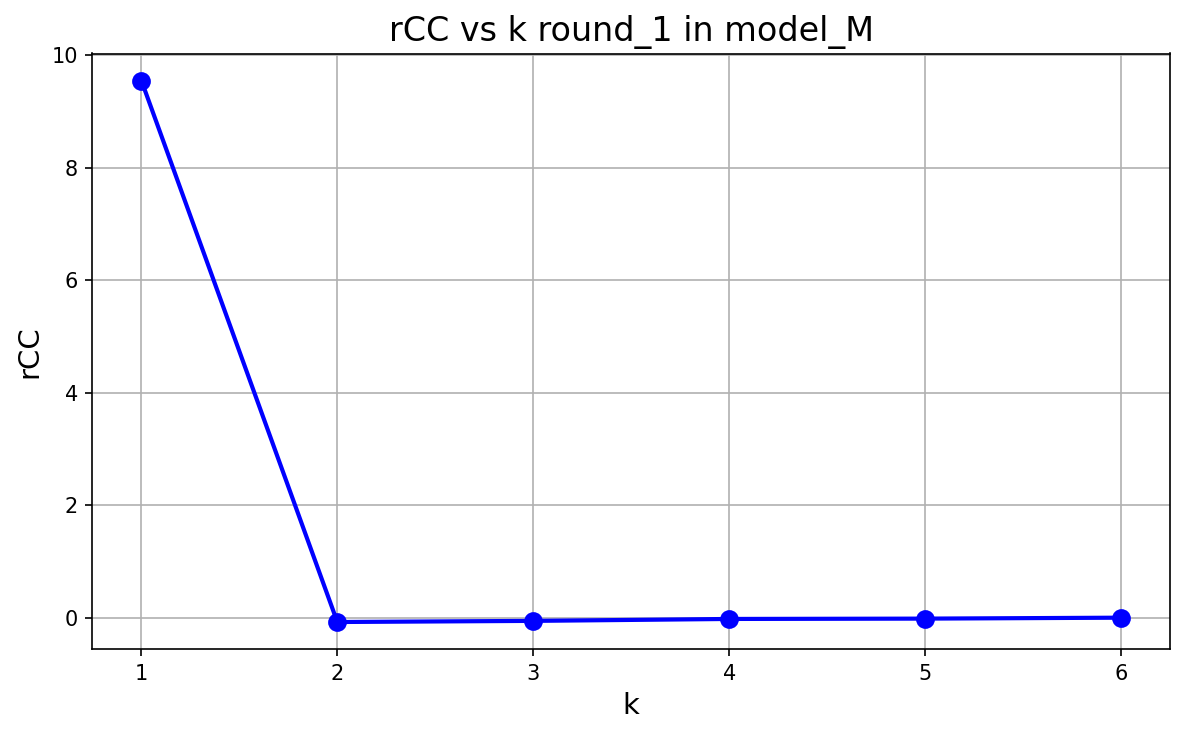

Optimal number of parameters to estimate for M: 2


In [11]:
from middoe.sc_estima import estima
round = 1
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, round)

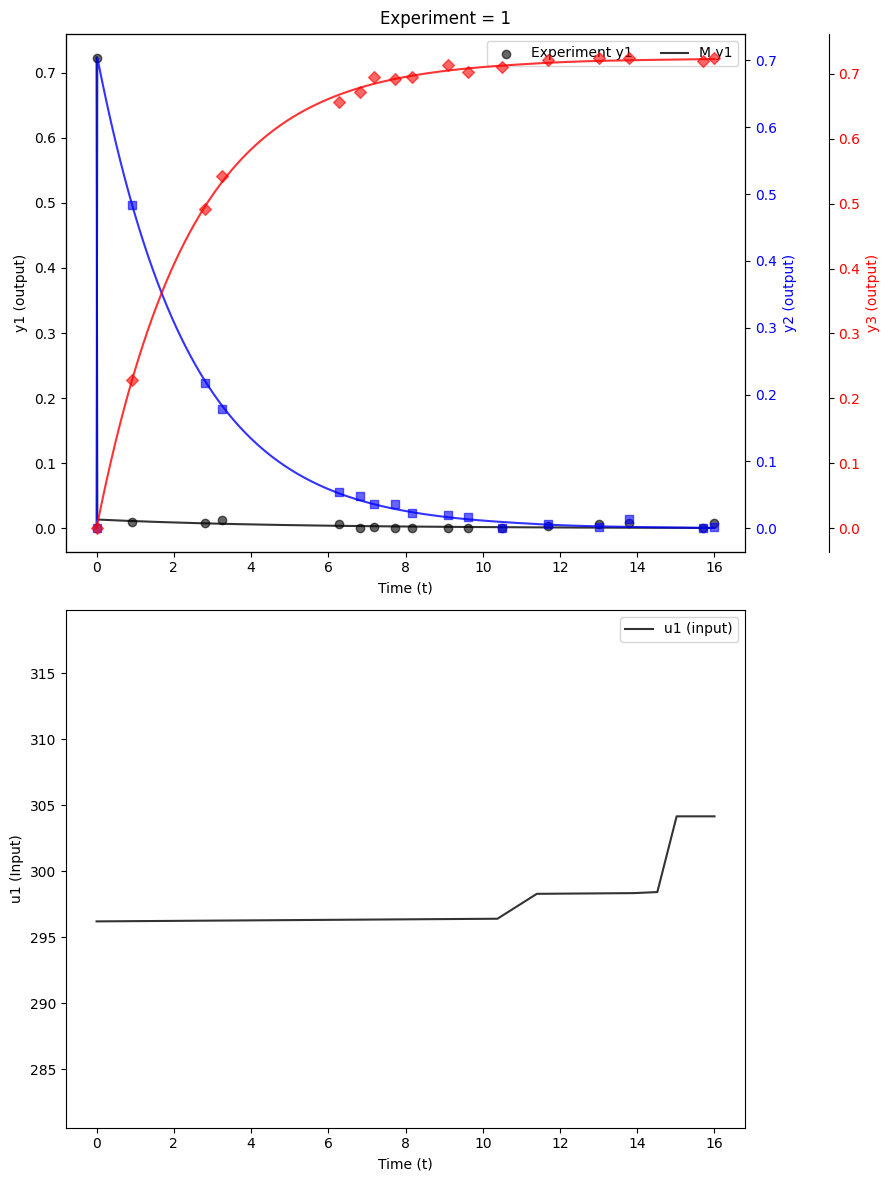

reference t value for model M and round 1: 2.014103388880846
estimated t values for model M and round 1: [62.25419468  1.24397968]
P-value for model M and round 1: 100.0



{'M': np.float64(2.014103388880846)}

In [12]:
from middoe.log_utils import  save_rounds
round_data={}
save_rounds(round, resultun,  'preliminary', round_data, models, iden_opt, obs, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values,  best_uncert_result= best_uncert_result)

In [13]:
des_opt = { # Design settings for the experiment
    'eps': 1e-5, #perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    'md_ob': 'BFF',     # MD optimality criterion, 'HR': Hunter and Reiner, 'BFF': Buzzi-Ferraris and Forzatti
    'pp_ob': 'E',  # PP optimality criterion, 'D', 'A', 'E', 'ME'
    'plt': True,  # Plot the results
    'meth': 'PS',
    # optimisation method, 'G': Global Differential Evolution, 'L': Local Pattern Search, 'GL': Global Differential Evolution refined with Local Pattern Search
    'itr': {
        'pps': 100, # population size
        'maxmd': 5, # maximum number of MD runs
        'tolmd': 1, # tolerance for MD optimization
        'maxpp':100 ,# maximum number of PP runs
        'tolpp': 1, # tolerance for PP optimization
    }
}

In [14]:
from middoe.des_pp import mbdoe_pp
round = 2
designs = mbdoe_pp(des_opt, system, models, round=round, num_parallel_runs=16)

In [15]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=round, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.005
   - y2         | measurable      | std.dev = 0.005
   - y3         | measurable      | std.dev = 0.005


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/paper/CS2 - SC2/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  MES_X:y3  \
 0        0.00  0.634344     0.005      0.00  0.000761     0.005      0.00   
 1        0.30  0.002897     0.005      0.30  0.516246     0.005      0.30   
 2        0.78  0.009971     0.005      0.78  0.382538     0.005      0.78   
 3        1.22  0.009973     0.005      1.22  0.292727     0.005      1.22   
 4        2.58  0.007784     0.005      2.58  0.131310     0.005      2.58   
 ..        ...       ...       ...       ...       ...       ...       ...   
 796       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 797       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 798       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 799       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 800       NaN       NaN       NaN       NaN       N

In [16]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, case='strov')

[INFO] Reading from indata.xlsx
bootstrap WLS is 251.8 and real one is 309.2 for M
bootstrap WLS is 225.0 and real one is 309.2 for M
bootstrap WLS is 234.4 and real one is 309.2 for M
bootstrap WLS is 496.6 and real one is 309.2 for M
bootstrap WLS is 311.4 and real one is 309.2 for M
bootstrap WLS is 260.9 and real one is 309.2 for M
bootstrap WLS is 275.7 and real one is 309.2 for M
bootstrap WLS is 351.2 and real one is 309.2 for M
bootstrap WLS is 249.1 and real one is 309.2 for M
bootstrap WLS is 255.0 and real one is 309.2 for M
bootstrap WLS is 235.5 and real one is 309.2 for M
bootstrap WLS is 270.5 and real one is 309.2 for M
bootstrap WLS is 396.4 and real one is 309.2 for M
bootstrap WLS is 172.1 and real one is 309.2 for M
bootstrap WLS is 365.3 and real one is 309.2 for M
bootstrap WLS is 266.9 and real one is 309.2 for M
bootstrap WLS is 305.9 and real one is 309.2 for M
bootstrap WLS is 258.2 and real one is 309.2 for M
bootstrap WLS is 220.4 and real one is 309.2 for M

In [18]:
from middoe.iden_uncert import uncert
uncert_results = uncert(resultpr, system, models, iden_opt)
resultun = uncert_results['results']
obs = uncert_results['obs']

active_idx: [0 1 2 3 4 5]


INFO:middoe.iden_uncert:Using bootstrap var–cov for M
INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈-4.53e-23; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [4.87957827e+05 7.60011333e+04 4.16893514e-01 1.10614134e+05
 4.92365046e+03 9.51511854e+04]
INFO:middoe.iden_uncert:Solver M: t-val = [ 1.09155189  0.88565399 26.88021512  7.78013677  1.65511442  1.09662383]


CI: [4.47031268e+05 8.58135731e+04 1.55093072e-02 1.42175051e+04
 2.97480971e+03 8.67673880e+04]


Estimability analysis for round 2 is running
Parameter ranking from most estimable to least estimable for M in round 2: [2, 4, 3, 5, 0, 1]
J_theta : 90.74984594030359


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=1/1, cond(Q)≈1.00e+00, cond(M)≈1.00e+00, λ_min(M)≈1.58e+05; OK


active_idx: [2]
CI: [0.00499383]
J_k 1 parameters: 1459.2589328163676
rCC 1 parameters: 13.318716538000626
active_idx: [2 4]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=2/2, cond(Q)≈4.52e+05, cond(M)≈2.04e+11, λ_min(M)≈1.03e-06; ILL-CONDITIONED


CI: [4.62863625e-03 1.95501719e+03]
J_k 2 parameters: 102.91099924279683
rCC 2 parameters: 0.04079562061267889
active_idx: [2 3 4]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=3/3, cond(Q)≈1.84e+06, cond(M)≈3.40e+12, λ_min(M)≈6.52e-08; ILL-CONDITIONED


CI: [6.46122135e-03 5.60466361e+03 7.76917936e+03]
J_k 3 parameters: 90.00472113639304
rCC 3 parameters: -0.0323338227604335
active_idx: [2 3 4 5]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/4, cond(Q)≈7.04e+07, cond(M)≈4.96e+15, λ_min(M)≈4.44e-11; ILL-CONDITIONED


CI: [6.44738219e-03 5.62412970e+03 2.03953565e+03 4.87268559e+01]
J_k 4 parameters: 93.8929473039319
rCC 4 parameters: -0.004200483511625891
active_idx: [0 2 3 4 5]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/5, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED


CI: [0.00000000e+00 6.39994466e-03 5.60327818e+03 7.01024744e+03
 1.61364414e+02]
J_k 5 parameters: 89.758162053196
rCC 5 parameters: -0.01628551560201035
active_idx: [2 3 4]


INFO:middoe.iden_uncert:Using bootstrap var–cov for M
INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=3/3, cond(Q)≈1.33e+06, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED


CI: [2.37688425e-02 1.85705003e+04 2.62302175e+03]


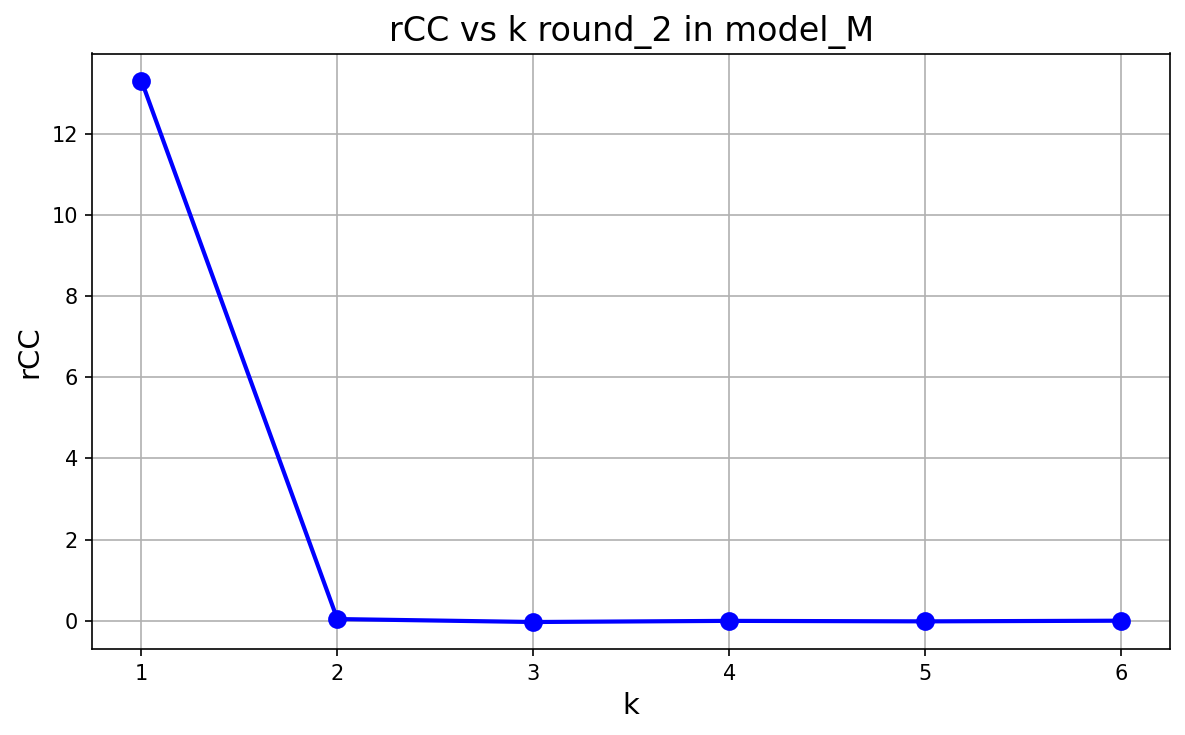

Optimal number of parameters to estimate for M: 3


In [19]:
from middoe.sc_estima import estima
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, round)

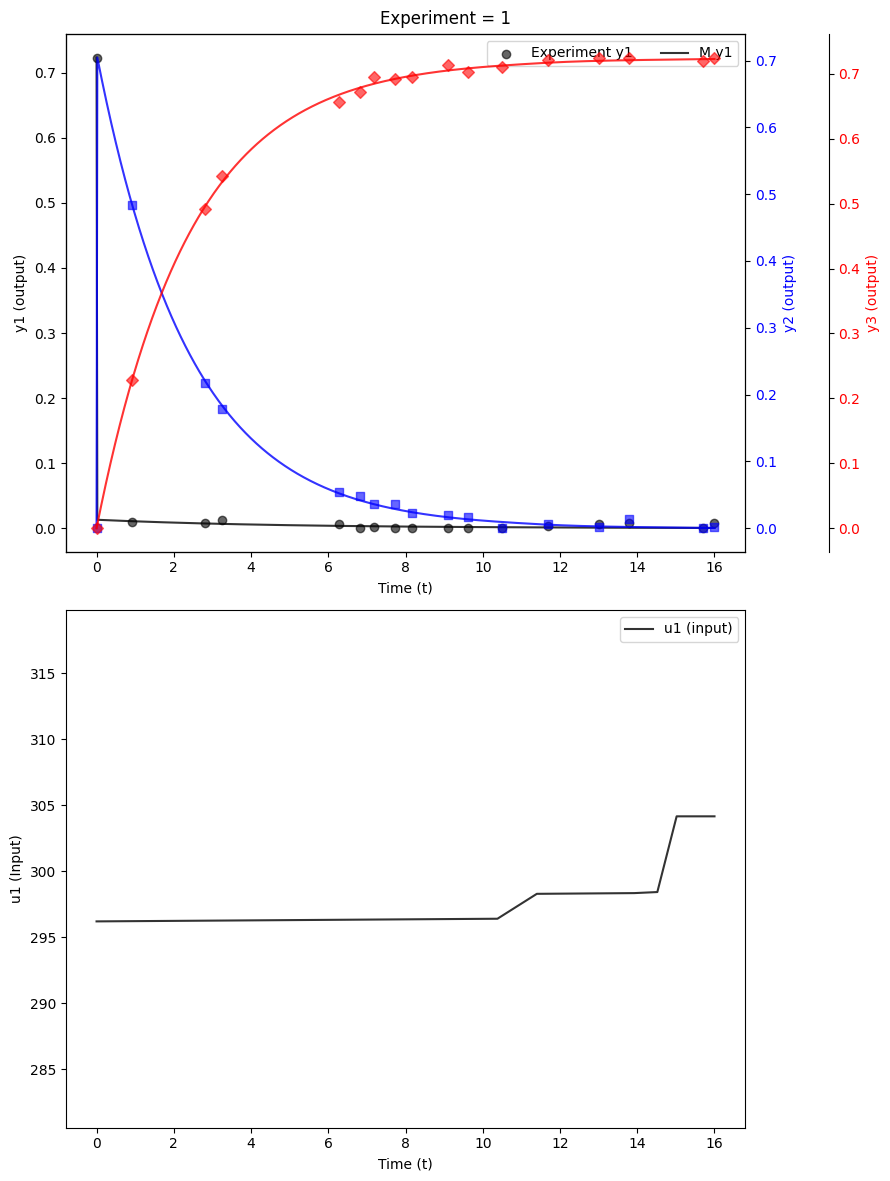

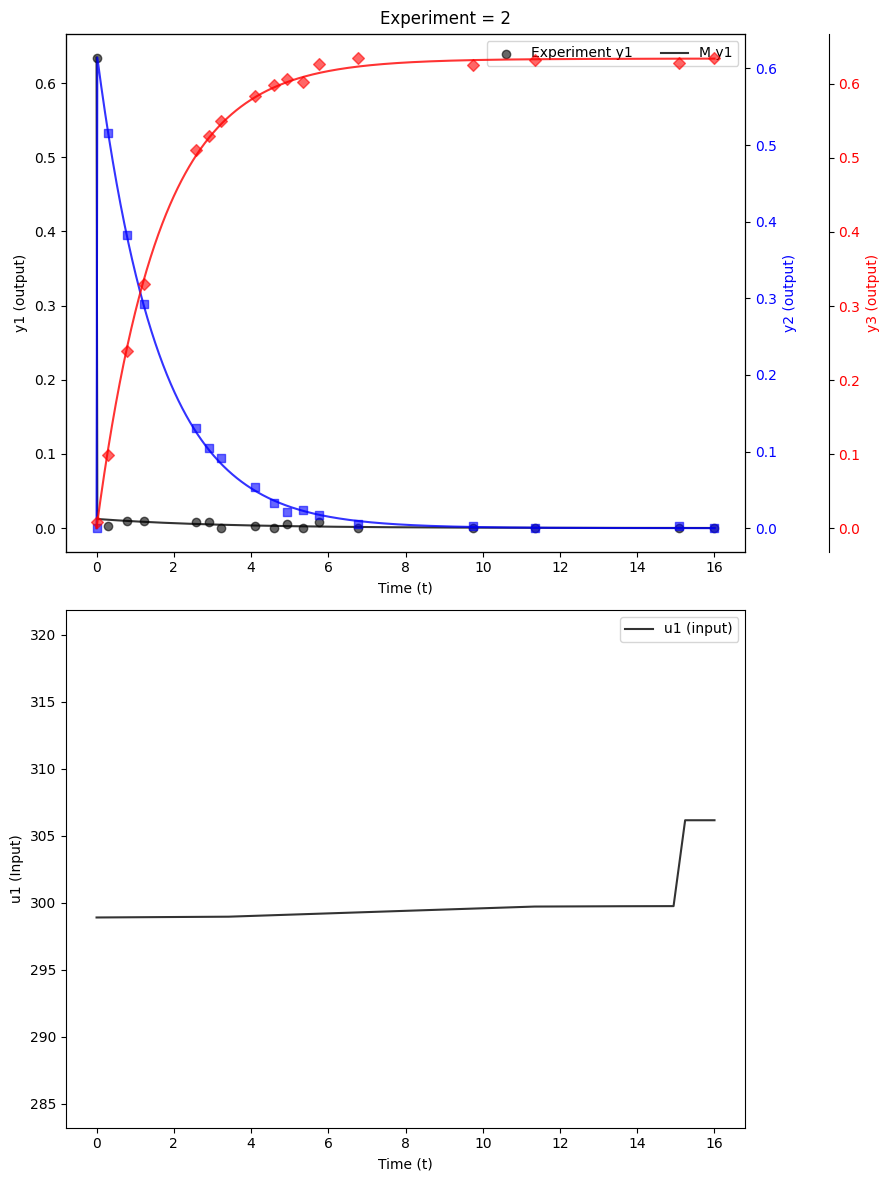

reference t value for model M and round 2: 1.9849843115310182
estimated t values for model M and round 2: [17.50401437  5.96064459  1.61091453]
P-value for model M and round 2: 100.0



{'M': np.float64(1.9849843115310182)}

In [20]:
from middoe.log_utils import  save_rounds
save_rounds(round, resultun,  'preliminary', round_data, models, iden_opt, obs, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values,  best_uncert_result= best_uncert_result)

In [21]:
from middoe.des_pp import mbdoe_pp
round = 3
designs = mbdoe_pp(des_opt, system, models, round=round, num_parallel_runs=16)

In [22]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=round, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.005
   - y2         | measurable      | std.dev = 0.005
   - y3         | measurable      | std.dev = 0.005


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/paper/CS2 - SC2/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  MES_X:y3  \
 0        0.00  0.511776     0.005      0.00  0.005031     0.005      0.00   
 1        2.94  0.005847     0.005      2.94  0.082661     0.005      2.94   
 2        3.24  0.005032     0.005      3.24  0.068465     0.005      3.24   
 3        5.12  0.000000     0.005      5.12  0.017753     0.005      5.12   
 4        7.78  0.000667     0.005      7.78  0.000000     0.005      7.78   
 ..        ...       ...       ...       ...       ...       ...       ...   
 796       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 797       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 798       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 799       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 800       NaN       NaN       NaN       NaN       N

In [23]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, case='strov')

[INFO] Reading from indata.xlsx
bootstrap WLS is 319.1 and real one is 370.9 for M
bootstrap WLS is 386.8 and real one is 370.9 for M
bootstrap WLS is 346.2 and real one is 370.9 for M
bootstrap WLS is 430.9 and real one is 370.9 for M
bootstrap WLS is 377.0 and real one is 370.9 for M
bootstrap WLS is 300.1 and real one is 370.9 for M
bootstrap WLS is 386.4 and real one is 370.9 for M
bootstrap WLS is 310.5 and real one is 370.9 for M
bootstrap WLS is 349.5 and real one is 370.9 for M
bootstrap WLS is 279.2 and real one is 370.9 for M
bootstrap WLS is 385.6 and real one is 370.9 for M
bootstrap WLS is 394.4 and real one is 370.9 for M
bootstrap WLS is 301.1 and real one is 370.9 for M
bootstrap WLS is 324.8 and real one is 370.9 for M
bootstrap WLS is 412.6 and real one is 370.9 for M
bootstrap WLS is 413.0 and real one is 370.9 for M
bootstrap WLS is 333.1 and real one is 370.9 for M
bootstrap WLS is 353.9 and real one is 370.9 for M
bootstrap WLS is 337.8 and real one is 370.9 for M

In [25]:
from middoe.iden_uncert import uncert
uncert_results = uncert(resultpr, system, models, iden_opt)
resultun = uncert_results['results']
obs = uncert_results['obs']

active_idx: [0 1 2 3 4 5]


INFO:middoe.iden_uncert:Using bootstrap var–cov for M
INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈4.78e+17, λ_min(M)≈1.02e-24; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [5.12050231e+05 1.05930368e+05 4.15756689e-01 1.10799057e+05
 4.32596460e+03 1.08860917e+05]
INFO:middoe.iden_uncert:Solver M: t-val = [ 1.18978699  1.12146912 27.83267117  7.88971624  1.47923556  1.35668243]


CI: [4.30371349e+05 9.44567847e+04 1.49377214e-02 1.40434781e+04
 2.92445959e+03 8.02405301e+04]


Estimability analysis for round 3 is running
Parameter ranking from most estimable to least estimable for M in round 3: [2, 4, 3, 5, 0, 1]
J_theta : 120.41495005055411


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=1/1, cond(Q)≈1.00e+00, cond(M)≈1.00e+00, λ_min(M)≈1.68e+05; OK


active_idx: [2]
CI: [0.00482277]
J_k 1 parameters: 1573.9564451627866
rCC 1 parameters: 9.43491173275969
active_idx: [2 4]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=2/2, cond(Q)≈1.00e+06, cond(M)≈1.01e+12, λ_min(M)≈2.29e-07; ILL-CONDITIONED


CI: [4.40648450e-03 4.12803775e+03]
J_k 2 parameters: 127.62075601733878
rCC 2 parameters: -0.005190810674610024
active_idx: [2 3 4]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=3/3, cond(Q)≈1.22e+06, cond(M)≈1.48e+12, λ_min(M)≈1.62e-07; ILL-CONDITIONED


CI: [5.80137341e-03 4.88535518e+03 1.97742511e+03]
J_k 3 parameters: 115.9139604530796
rCC 3 parameters: -0.03137513620254775
active_idx: [2 3 4 5]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/4, cond(Q)≈2.88e+08, cond(M)≈8.28e+16, λ_min(M)≈1.19e-10; ILL-CONDITIONED


CI: [6.39028595e-04 3.49183725e+03 9.17613048e+02 2.43489002e+01]
J_k 4 parameters: 126.81894810036506
rCC 4 parameters: 0.015712405554319943
active_idx: [0 2 3 4 5]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/5, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED


CI: [0.00000000e+00 6.40316714e-03 5.27765654e+03 9.66602958e+02
 5.24355159e+01]
J_k 5 parameters: 138.5928198474961
rCC 5 parameters: 0.10573771109112404
active_idx: [2 3 4]


INFO:middoe.iden_uncert:Using bootstrap var–cov for M
INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=3/3, cond(Q)≈1.30e+06, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED


CI: [1.53241495e-02 1.26409341e+04 3.34499734e+03]


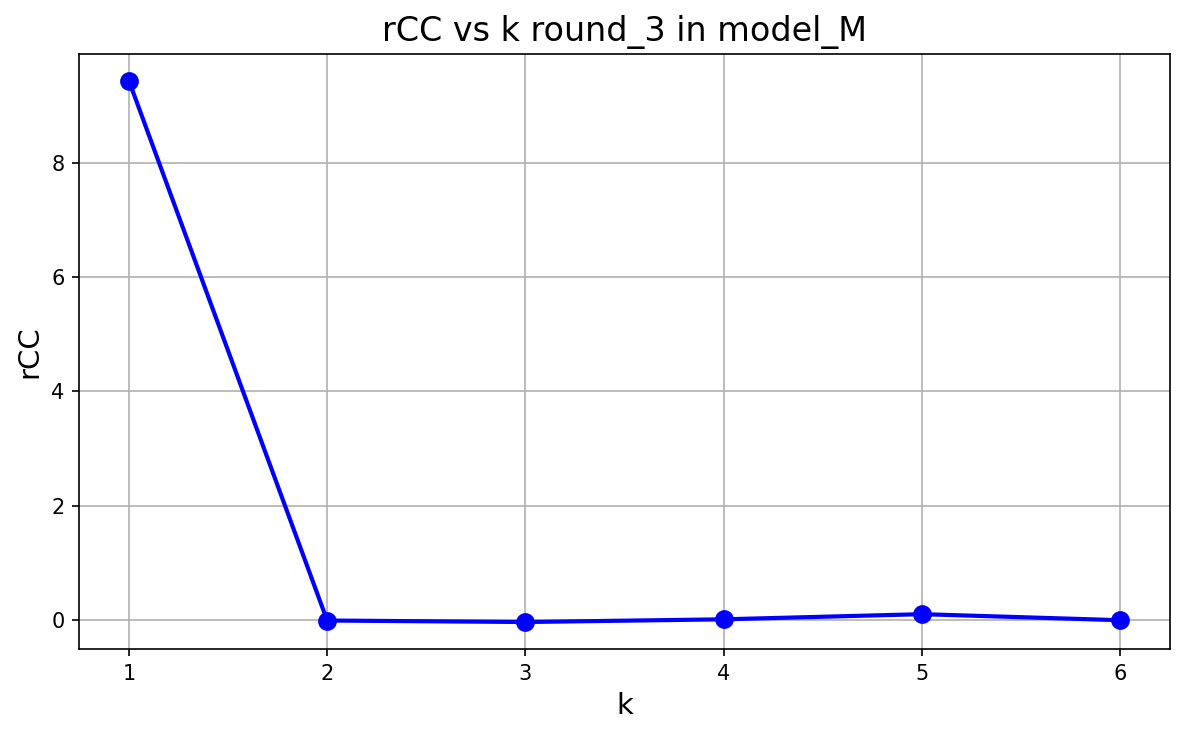

Optimal number of parameters to estimate for M: 3


In [26]:
from middoe.sc_estima import estima
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, round)

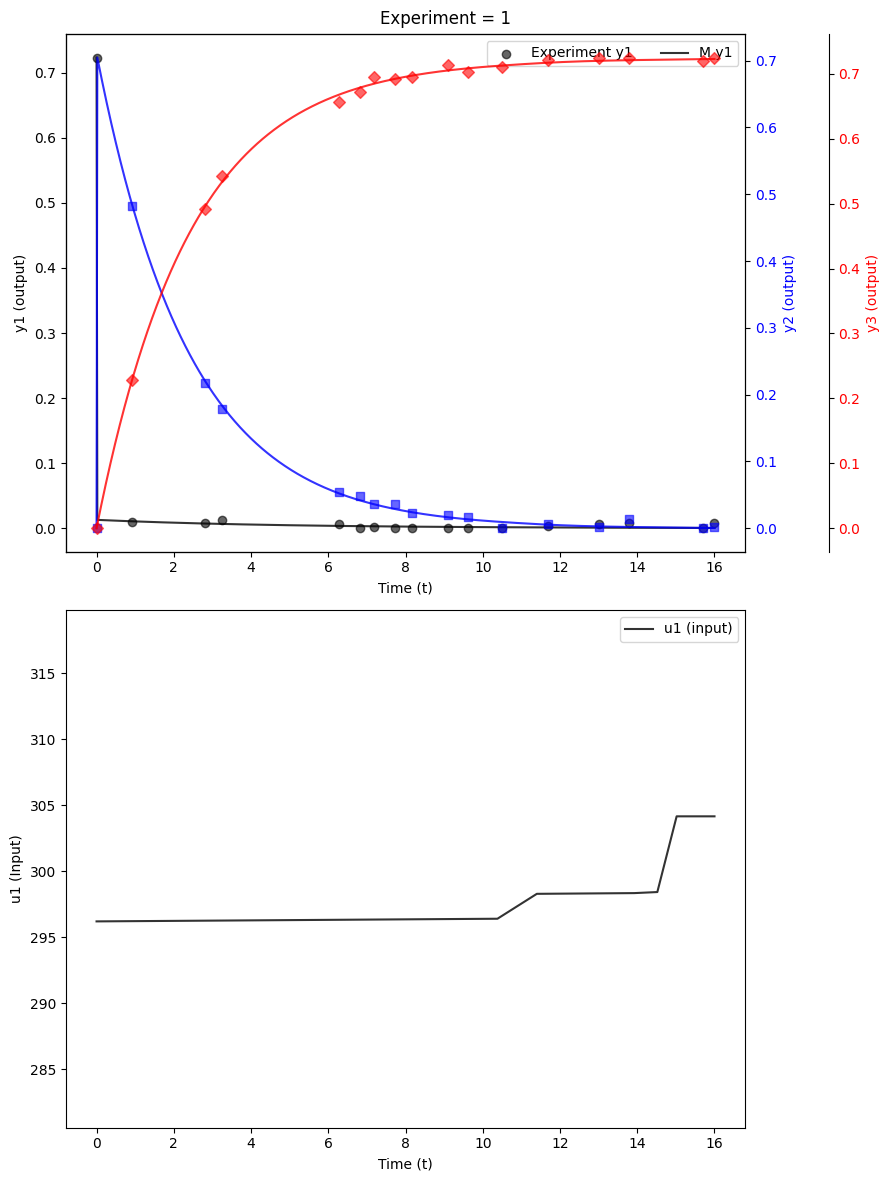

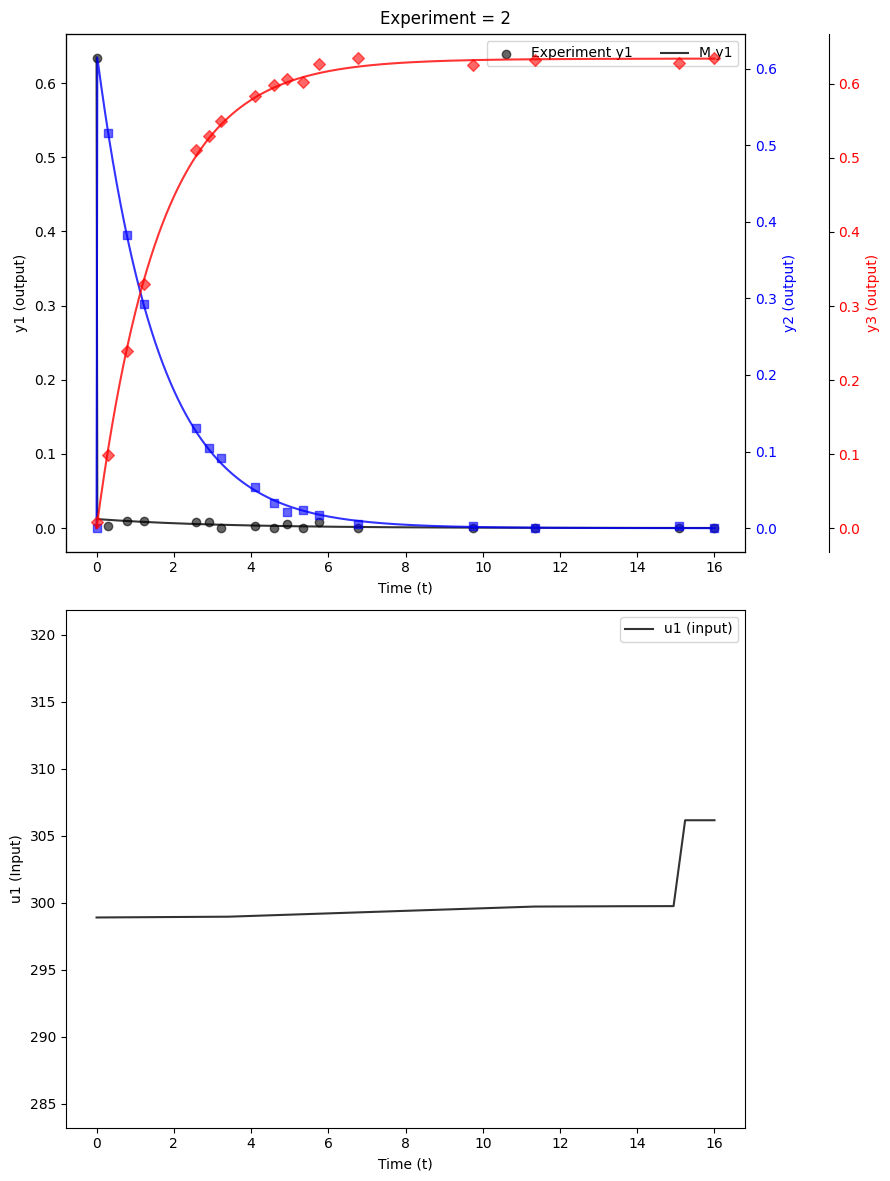

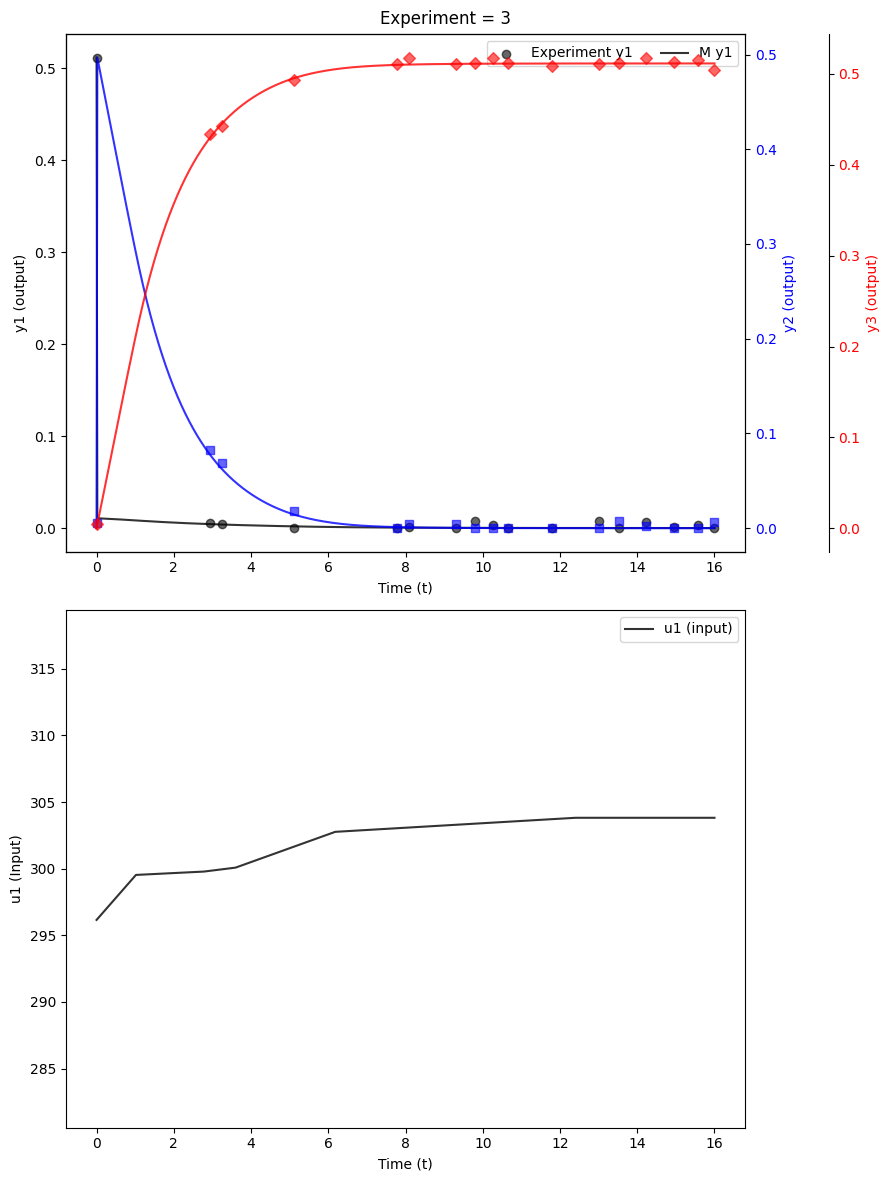

reference t value for model M and round 3: 1.9762333088845878
estimated t values for model M and round 3: [27.16172764  8.67707339  1.29665776]
P-value for model M and round 3: 100.0



{'M': np.float64(1.9762333088845878)}

In [27]:
from middoe.log_utils import  save_rounds
save_rounds(round, resultun,  'preliminary', round_data, models, iden_opt, obs, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values,  best_uncert_result= best_uncert_result)

In [28]:
from middoe.des_pp import mbdoe_pp
round = 4
designs = mbdoe_pp(des_opt, system, models, round=round, num_parallel_runs=16)

In [29]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=round, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.005
   - y2         | measurable      | std.dev = 0.005
   - y3         | measurable      | std.dev = 0.005


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/paper/CS2 - SC2/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  MES_X:y3  \
 0        0.00  0.798495     0.005      0.00  0.009116     0.005      0.00   
 1        0.30  0.007366     0.005      0.30  0.679627     0.005      0.30   
 2        6.26  0.000079     0.005      6.26  0.010236     0.005      6.26   
 3        6.62  0.002185     0.005      6.62  0.006431     0.005      6.62   
 4        7.02  0.008212     0.005      7.02  0.002666     0.005      7.02   
 ..        ...       ...       ...       ...       ...       ...       ...   
 796       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 797       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 798       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 799       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 800       NaN       NaN       NaN       NaN       N

In [30]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, case='strov')

[INFO] Reading from indata.xlsx
bootstrap WLS is 464.5 and real one is 1017.6 for M
bootstrap WLS is 531.5 and real one is 1017.6 for M
bootstrap WLS is 349.7 and real one is 1017.6 for M
bootstrap WLS is 563.0 and real one is 1017.6 for M
bootstrap WLS is 402.3 and real one is 1017.6 for M
bootstrap WLS is 470.3 and real one is 1017.6 for M
bootstrap WLS is 942.5 and real one is 1017.6 for M
bootstrap WLS is 443.3 and real one is 1017.6 for M
bootstrap WLS is 446.1 and real one is 1017.6 for M
bootstrap WLS is 409.9 and real one is 1017.6 for M
bootstrap WLS is 476.1 and real one is 1017.6 for M
bootstrap WLS is 397.3 and real one is 1017.6 for M
bootstrap WLS is 496.2 and real one is 1017.6 for M
bootstrap WLS is 459.9 and real one is 1017.6 for M
bootstrap WLS is 506.6 and real one is 1017.6 for M
bootstrap WLS is 518.2 and real one is 1017.6 for M
bootstrap WLS is 400.1 and real one is 1017.6 for M
bootstrap WLS is 433.7 and real one is 1017.6 for M
bootstrap WLS is 407.8 and real 

In [32]:
from middoe.iden_uncert import uncert
uncert_results = uncert(resultpr, system, models, iden_opt)
resultun = uncert_results['results']
obs = uncert_results['obs']

active_idx: [0 1 2 3 4 5]


INFO:middoe.iden_uncert:Using bootstrap var–cov for M
INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈7.54e+17, λ_min(M)≈5.05e-25; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [5.69643485e+05 8.64670587e+04 4.18526177e-01 1.08043752e+05
 4.78004595e+03 1.10669579e+05]
INFO:middoe.iden_uncert:Solver M: t-val = [ 1.45202685  0.96319451 27.36043434  7.46959181  1.38268973  1.33724193]


CI: [3.92309196e+05 8.97711288e+04 1.52967665e-02 1.44644787e+04
 3.45706333e+03 8.27595788e+04]


Estimability analysis for round 4 is running
Parameter ranking from most estimable to least estimable for M in round 4: [2, 4, 3, 5, 0, 1]
J_theta : 147.60692020126595
active_idx: [2]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=1/1, cond(Q)≈1.00e+00, cond(M)≈1.00e+00, λ_min(M)≈1.74e+05; OK


CI: [0.00472833]
J_k 1 parameters: 1993.795047498608
rCC 1 parameters: 9.000922192634029
active_idx: [2 4]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=2/2, cond(Q)≈5.40e+05, cond(M)≈2.91e+11, λ_min(M)≈8.09e-07; ILL-CONDITIONED


CI: [4.29425224e-03 2.19229060e+03]
J_k 2 parameters: 155.84071830364113
rCC 2 parameters: 0.0011460691292900743
active_idx: [2 3 4]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=3/3, cond(Q)≈1.31e+06, cond(M)≈1.72e+12, λ_min(M)≈1.40e-07; ILL-CONDITIONED


CI: [6.28696158e-03 5.27237654e+03 8.07254784e+02]
J_k 3 parameters: 153.9534038335011
rCC 3 parameters: 0.001698449177623348
active_idx: [2 3 4 5]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/4, cond(Q)≈4.79e+07, cond(M)≈2.30e+15, λ_min(M)≈1.07e-10; ILL-CONDITIONED


CI: [6.16748764e-03 5.16659725e+03 2.09288548e+03 3.81244002e+01]
J_k 4 parameters: 145.53049392063045
rCC 4 parameters: -0.01489320166822427
active_idx: [0 2 3 4 5]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/5, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED


CI: [0.00000000e+00 6.04244090e-03 5.08752337e+03 1.87899559e+03
 4.11827733e+01]
J_k 5 parameters: 150.1798015827596
rCC 5 parameters: 0.0035061483055348324
active_idx: [2 3 4 5]


INFO:middoe.iden_uncert:Using bootstrap var–cov for M
INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/4, cond(Q)≈5.91e+07, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED


CI: [1.54872375e-02 1.50686703e+04 3.17063907e+03 8.66952619e+04]


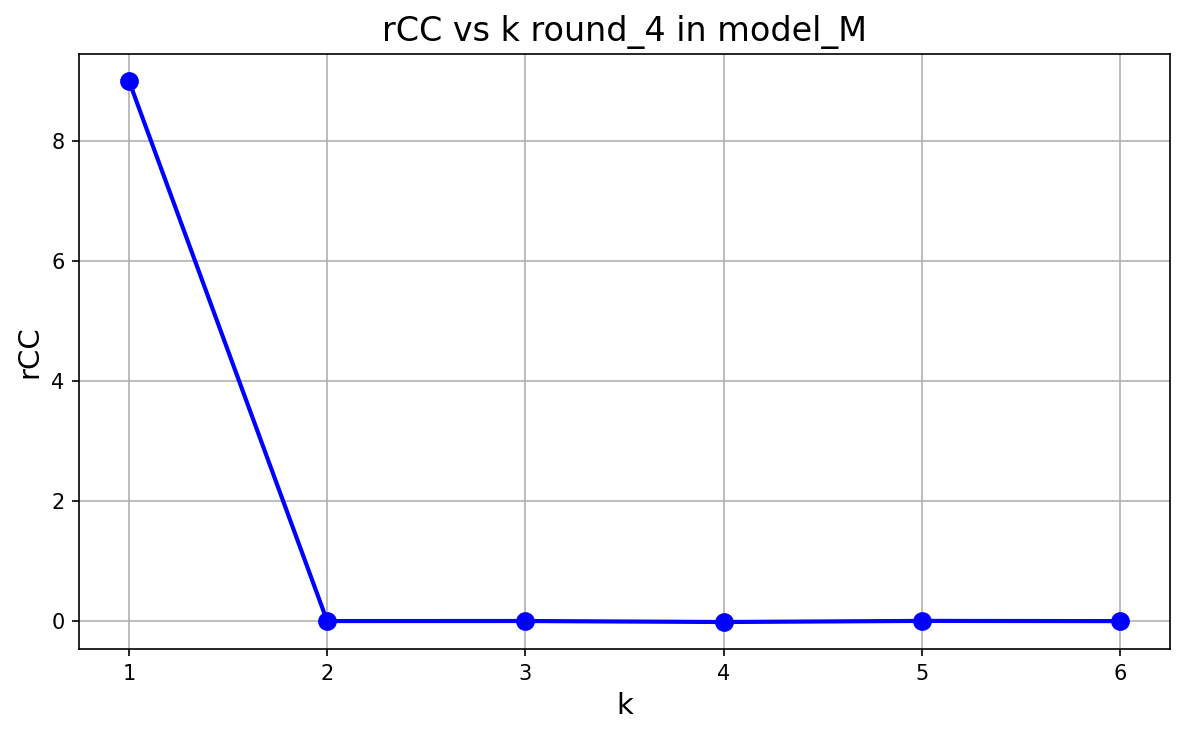

Optimal number of parameters to estimate for M: 4


In [33]:
from middoe.sc_estima import estima
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, round)

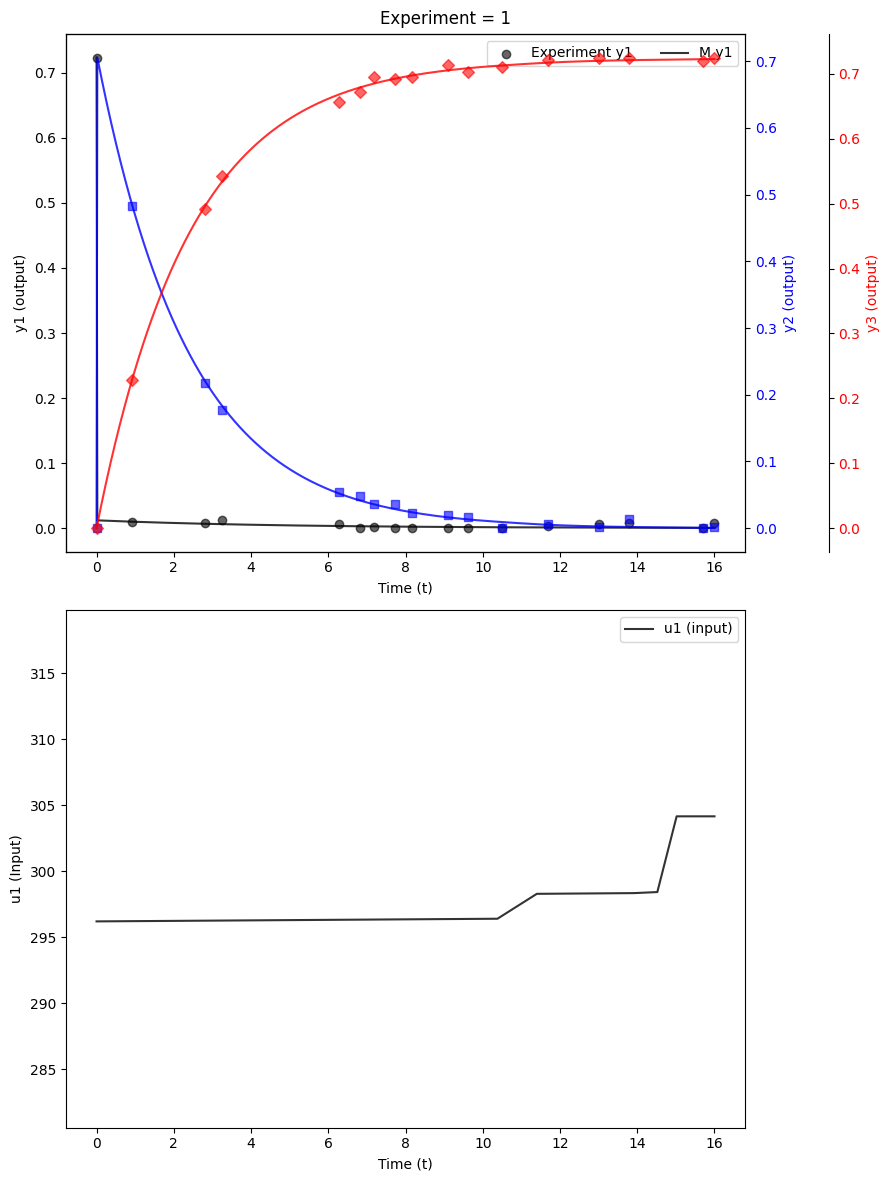

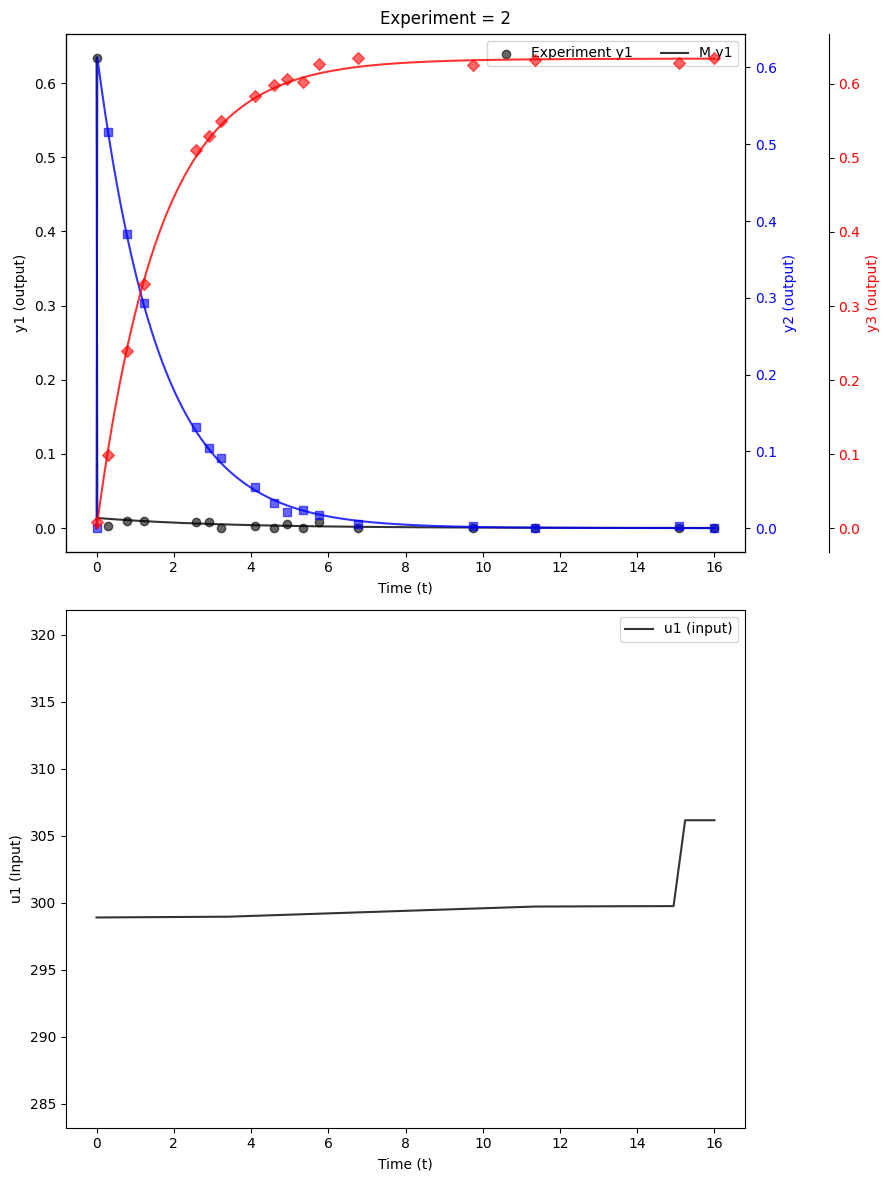

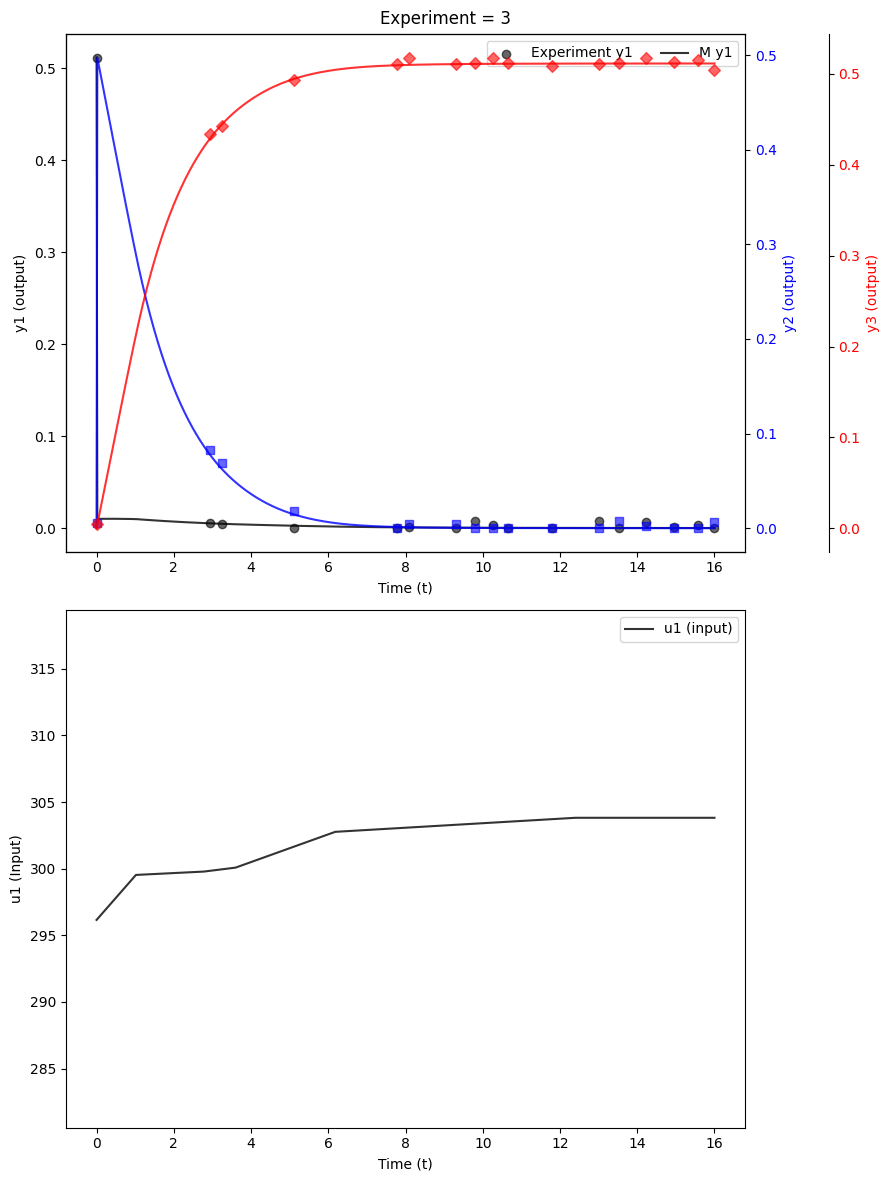

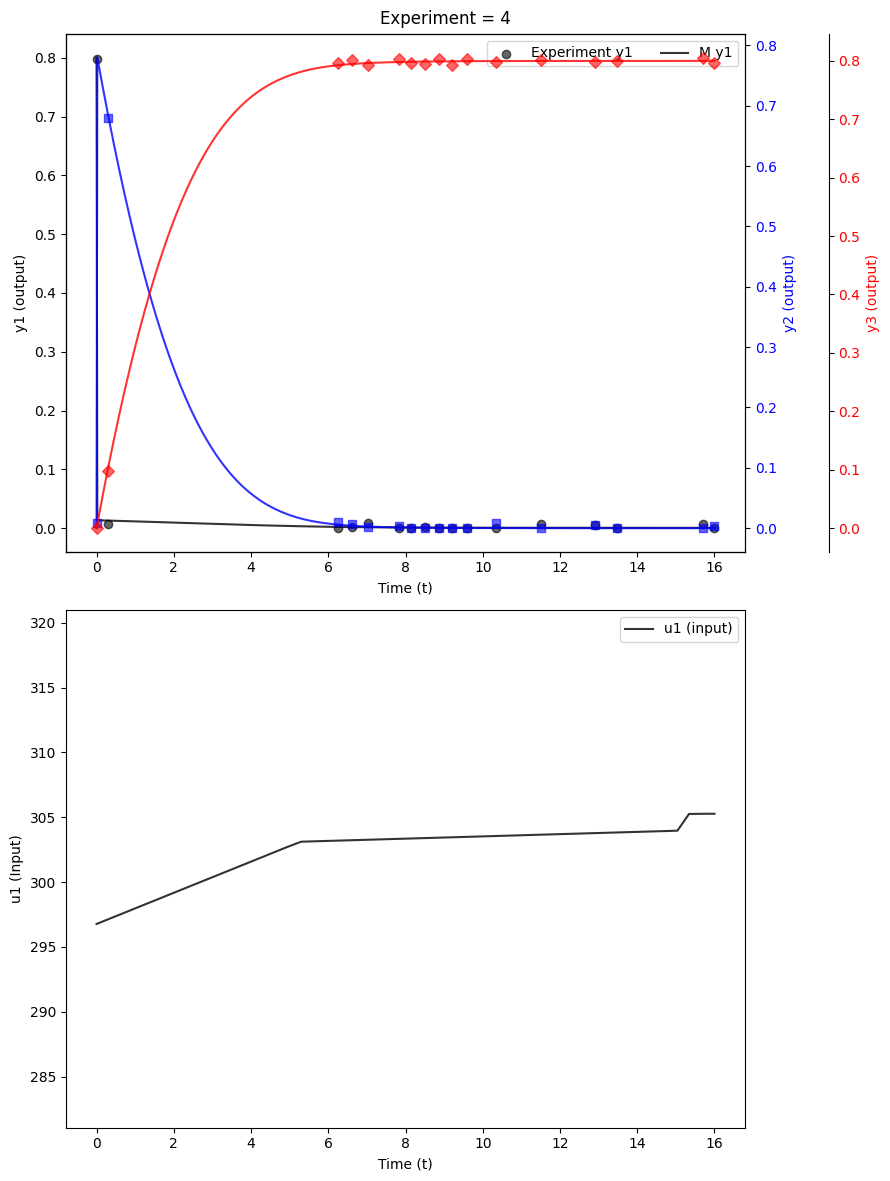

reference t value for model M and round 4: 1.9720174778338955
estimated t values for model M and round 4: [26.88038922  7.27907877  1.54826009  1.23528355]
P-value for model M and round 4: 100.0



{'M': np.float64(1.9720174778338955)}

In [34]:
from middoe.log_utils import  save_rounds
save_rounds(round, resultun,  'preliminary', round_data, models, iden_opt, obs, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values,  best_uncert_result= best_uncert_result)

Running validation fold 1/4...
Validation sheet: 1
bootstrap WLS is 301.4 and real one is 322.9 for M
bootstrap WLS is 294.2 and real one is 322.9 for M
bootstrap WLS is 239.4 and real one is 322.9 for M
bootstrap WLS is 334.8 and real one is 322.9 for M
bootstrap WLS is 250.2 and real one is 322.9 for M
bootstrap WLS is 324.2 and real one is 322.9 for M
bootstrap WLS is 311.3 and real one is 322.9 for M
bootstrap WLS is 283.4 and real one is 322.9 for M
bootstrap WLS is 311.4 and real one is 322.9 for M
bootstrap WLS is 293.4 and real one is 322.9 for M
bootstrap WLS is 306.4 and real one is 322.9 for M
bootstrap WLS is 325.1 and real one is 322.9 for M
bootstrap WLS is 369.8 and real one is 322.9 for M
bootstrap WLS is 236.9 and real one is 322.9 for M
bootstrap WLS is 418.8 and real one is 322.9 for M
bootstrap WLS is 339.5 and real one is 322.9 for M
bootstrap WLS is 213.8 and real one is 322.9 for M
bootstrap WLS is 259.1 and real one is 322.9 for M
bootstrap WLS is 332.2 and real

INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [5.20277025e+05 1.24207180e+05 4.44022653e-01 9.39058846e+04
 6.03316948e+03 1.16490525e+05]
INFO:middoe.iden_uncert:Solver M: t-val = [         inf          inf  11.60939707   4.03641543 183.02710589
   0.83157531]


CI: [0.00000000e+00 0.00000000e+00 3.82468314e-02 2.32646729e+04
 3.29632567e+01 1.40084154e+05]
active_idx: [0 1 2 3 4 5]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [5.20277025e+05 1.24207180e+05 4.44022653e-01 9.39058846e+04
 6.03316948e+03 1.16490525e+05]
INFO:middoe.iden_uncert:Solver M: t-val = [           inf            inf 5.96465468e+01 2.05595492e+03
 8.78870832e-01 1.05173804e+04]


CI: [0.00000000e+00 0.00000000e+00 7.44423067e-03 4.56750699e+01
 6.86468280e+03 1.10760018e+01]
Running validation fold 2/4...
Validation sheet: 2
bootstrap WLS is 323.7 and real one is 307.6 for M
bootstrap WLS is 347.4 and real one is 307.6 for M
bootstrap WLS is 338.9 and real one is 307.6 for M
bootstrap WLS is 281.1 and real one is 307.6 for M
bootstrap WLS is 320.1 and real one is 307.6 for M
bootstrap WLS is 321.4 and real one is 307.6 for M
bootstrap WLS is 240.1 and real one is 307.6 for M
bootstrap WLS is 278.0 and real one is 307.6 for M
bootstrap WLS is 340.2 and real one is 307.6 for M
bootstrap WLS is 328.1 and real one is 307.6 for M
bootstrap WLS is 350.9 and real one is 307.6 for M
bootstrap WLS is 326.7 and real one is 307.6 for M
bootstrap WLS is 334.4 and real one is 307.6 for M
bootstrap WLS is 293.3 and real one is 307.6 for M
bootstrap WLS is 337.2 and real one is 307.6 for M
bootstrap WLS is 322.4 and real one is 307.6 for M
bootstrap WLS is 305.2 and real one 

INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [5.08140034e+05 9.66922303e+04 4.16600327e-01 1.05563747e+05
 4.13808518e+03 9.26747545e+04]
INFO:middoe.iden_uncert:Solver M: t-val = [           inf            inf 8.11787454e+01 7.16918945e+01
 2.67353770e+00 2.30159217e+04]


CI: [0.00000000e+00 0.00000000e+00 5.13188920e-03 1.47246418e+03
 1.54779384e+03 4.02654978e+00]
active_idx: [0 1 2 3 4 5]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [5.08140034e+05 9.66922303e+04 4.16600327e-01 1.05563747e+05
 4.13808518e+03 9.26747545e+04]
INFO:middoe.iden_uncert:Solver M: t-val = [           inf            inf 6.59555770e+01 2.63475747e+04
 1.58686446e+00 2.27510237e+03]


CI: [0.00000000e+00 0.00000000e+00 6.31637756e-03 4.00658307e+00
 2.60771180e+03 4.07343228e+01]
Running validation fold 3/4...
Validation sheet: 3
bootstrap WLS is 404.2 and real one is 354.7 for M
bootstrap WLS is 402.9 and real one is 354.7 for M
bootstrap WLS is 339.1 and real one is 354.7 for M
bootstrap WLS is 370.6 and real one is 354.7 for M
bootstrap WLS is 257.2 and real one is 354.7 for M
bootstrap WLS is 499.7 and real one is 354.7 for M
bootstrap WLS is 349.2 and real one is 354.7 for M
bootstrap WLS is 321.0 and real one is 354.7 for M
bootstrap WLS is 349.0 and real one is 354.7 for M
bootstrap WLS is 359.6 and real one is 354.7 for M
bootstrap WLS is 394.4 and real one is 354.7 for M
bootstrap WLS is 391.5 and real one is 354.7 for M
bootstrap WLS is 418.8 and real one is 354.7 for M
bootstrap WLS is 379.4 and real one is 354.7 for M
bootstrap WLS is 409.3 and real one is 354.7 for M
bootstrap WLS is 413.0 and real one is 354.7 for M
bootstrap WLS is 314.2 and real one 

INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [5.31159878e+05 1.10078131e+05 4.15030543e-01 1.11815326e+05
 4.63725517e+03 1.14724307e+05]
INFO:middoe.iden_uncert:Solver M: t-val = [           inf            inf 6.87264848e+01 2.05889542e+01
 2.13160085e+00 2.28248488e+03]


CI: [0.00000000e+00 0.00000000e+00 6.03887343e-03 5.43084049e+03
 2.17548008e+03 5.02628991e+01]
active_idx: [0 1 2 3 4 5]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [5.31159878e+05 1.10078131e+05 4.15030543e-01 1.11815326e+05
 4.63725517e+03 1.14724307e+05]
INFO:middoe.iden_uncert:Solver M: t-val = [        inf         inf  1.59547319  0.74687523  0.46922978 14.48718459]


CI: [0.00000000e+00 0.00000000e+00 2.60130063e-01 1.49710852e+05
 9.88269579e+03 7.91902019e+03]
Running validation fold 4/4...
Validation sheet: 4
bootstrap WLS is 299.7 and real one is 362.1 for M
bootstrap WLS is 420.7 and real one is 362.1 for M
bootstrap WLS is 391.5 and real one is 362.1 for M
bootstrap WLS is 448.8 and real one is 362.1 for M
bootstrap WLS is 333.9 and real one is 362.1 for M
bootstrap WLS is 498.0 and real one is 362.1 for M
bootstrap WLS is 385.2 and real one is 362.1 for M
bootstrap WLS is 306.8 and real one is 362.1 for M
bootstrap WLS is 380.8 and real one is 362.1 for M
bootstrap WLS is 318.3 and real one is 362.1 for M
bootstrap WLS is 404.5 and real one is 362.1 for M
bootstrap WLS is 407.9 and real one is 362.1 for M
bootstrap WLS is 341.1 and real one is 362.1 for M
bootstrap WLS is 336.7 and real one is 362.1 for M
bootstrap WLS is 330.3 and real one is 362.1 for M
bootstrap WLS is 651.3 and real one is 362.1 for M
bootstrap WLS is 392.8 and real one 

INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [5.76629597e+05 9.48699775e+04 4.17920226e-01 1.09086408e+05
 4.82582309e+03 1.08060408e+05]
INFO:middoe.iden_uncert:Solver M: t-val = [           inf            inf 6.58736089e+01 2.07529994e+01
 2.25227631e+00 2.77549356e+03]


CI: [0.00000000e+00 0.00000000e+00 6.34427402e-03 5.25641647e+03
 2.14264257e+03 3.89337629e+01]
active_idx: [0 1 2 3 4 5]


INFO:middoe.iden_uncert:Conditioning diagnostics: Rank(Q)=4/6, cond(Q)≈inf, cond(M)≈inf, λ_min(M)≈0.00e+00; ILL-CONDITIONED
INFO:middoe.iden_uncert:Solver M: Estimated θ = [5.76629597e+05 9.48699775e+04 4.17920226e-01 1.09086408e+05
 4.82582309e+03 1.08060408e+05]
INFO:middoe.iden_uncert:Solver M: t-val = [       inf        inf 8.89376125 2.05234255 0.57471664 0.15810008]


CI: [0.00000000e+00 0.00000000e+00 4.69902681e-02 5.31521446e+04
 8.39687382e+03 6.83493700e+05]


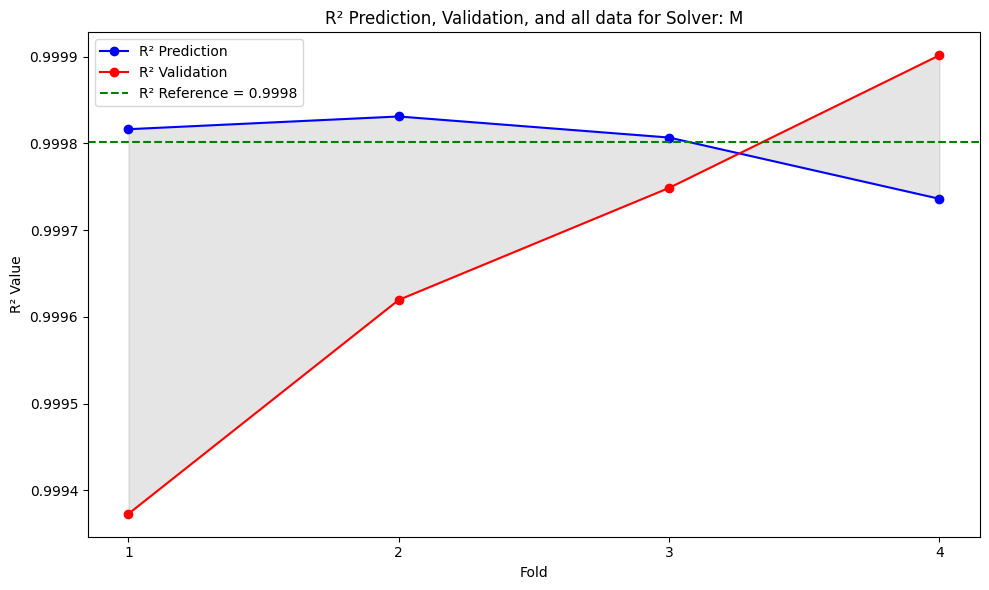

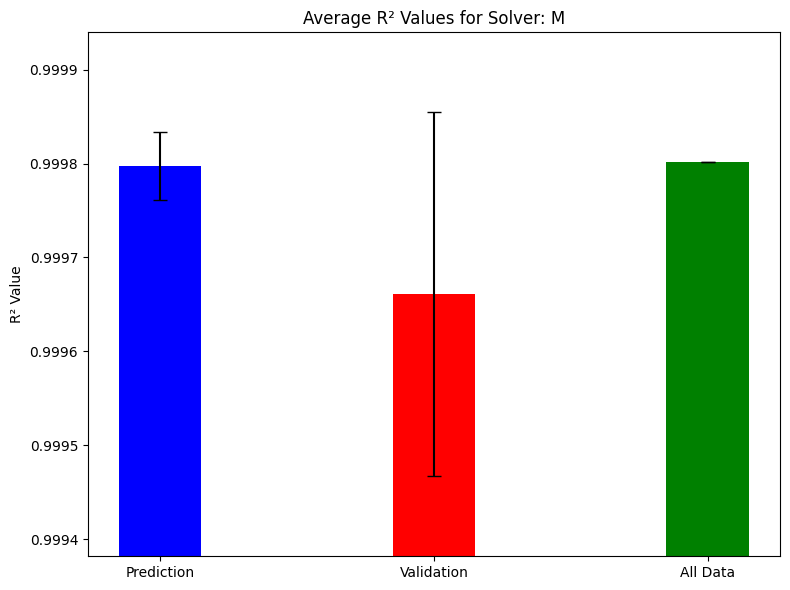

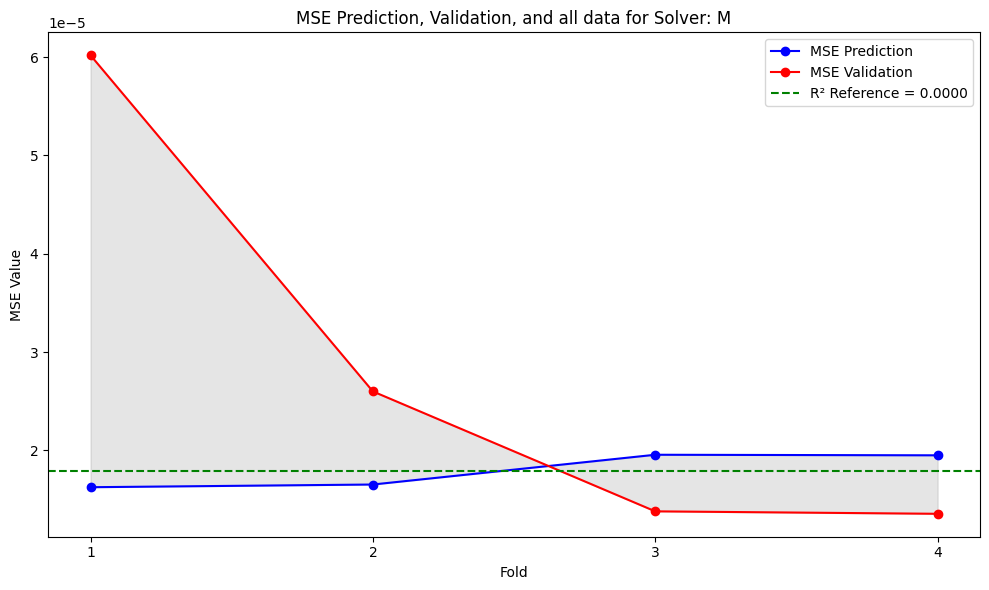

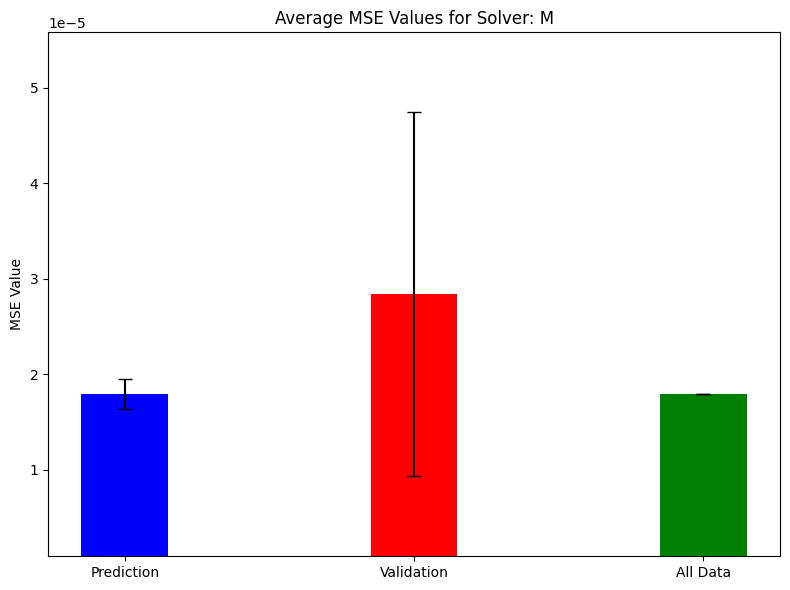

{'R2_prd': {1: {'M': np.float64(0.9998163774665454)}, 2: {'M': np.float64(0.9998310423125938)}, 3: {'M': np.float64(0.9998067664500538)}, 4: {'M': np.float64(0.9997361122727333)}}, 'R2_val': {1: {'M': np.float64(0.9993729581586867)}, 2: {'M': np.float64(0.9996195828472406)}, 3: {'M': np.float64(0.9997487041928577)}, 4: {'M': np.float64(0.9999016183221113)}}, 'R2_stats': {'M': {'prediction_mean': np.float64(0.9997975746254816), 'prediction_std': np.float64(3.652308638735905e-05), 'validation_mean': np.float64(0.999660715880224), 'validation_std': np.float64(0.00019382489673296283)}}, 'MSE_stats': {'M': {'prediction_mean': np.float64(1.7961867941922804e-05), 'prediction_std': np.float64(1.5712803026308682e-06), 'validation_mean': np.float64(2.8387629928089425e-05), 'validation_std': np.float64(1.9040959298334834e-05)}}}


In [35]:
from middoe.iden_valida import validation
validres= validation(system, models, iden_opt, round_data)

In [36]:
from middoe.log_utils import save_to_jac
save_to_jac(round_data, purpose="iden")

[INFO] Results saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\iden_results.jac


In [3]:
from middoe.log_utils import load_from_jac
results = load_from_jac()
iden = results['iden']

Loaded: iden_results.jac
File not found: sensa_results.jac


INFO:middoe.iden_utils:Starting pcomp_plot.


Loaded: iden_results.jac
File not found: sensa_results.jac


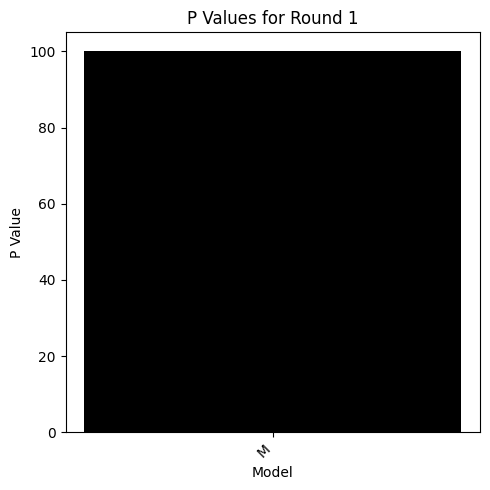

INFO:middoe.iden_utils:P values plot for Round 1 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\p_values_round_1.png.


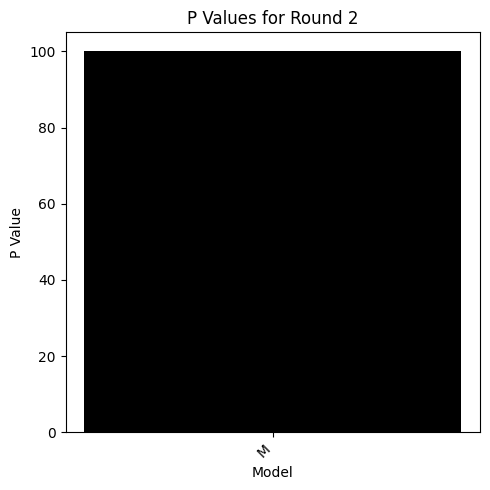

INFO:middoe.iden_utils:P values plot for Round 2 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\p_values_round_2.png.


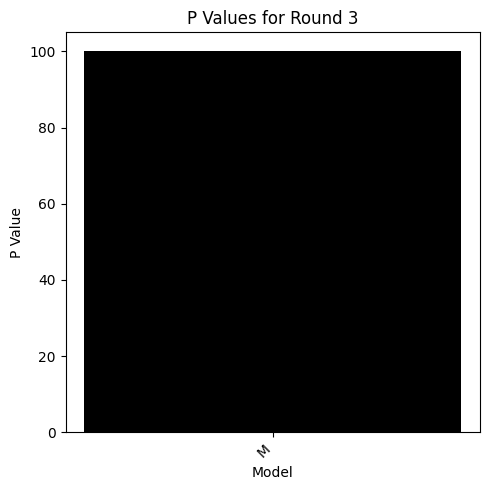

INFO:middoe.iden_utils:P values plot for Round 3 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\p_values_round_3.png.


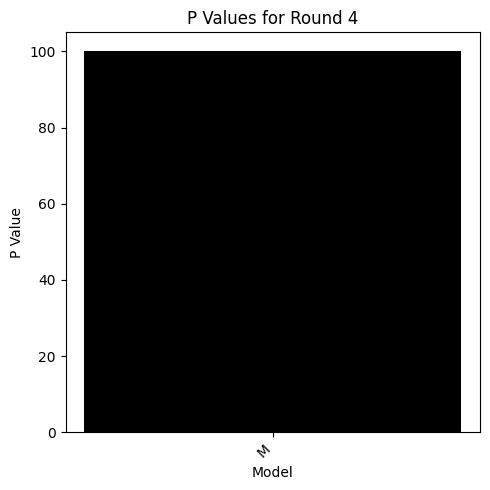

INFO:middoe.iden_utils:P values plot for Round 4 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\p_values_round_4.png.
INFO:middoe.iden_utils:Starting tcomp_plot.


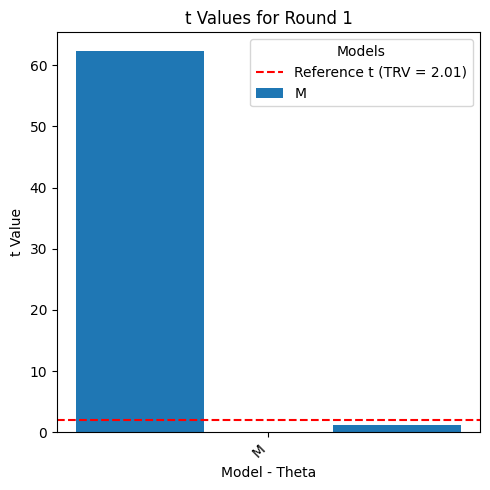

INFO:middoe.iden_utils:T values plot for Round 1 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\t_values_round_1.png.


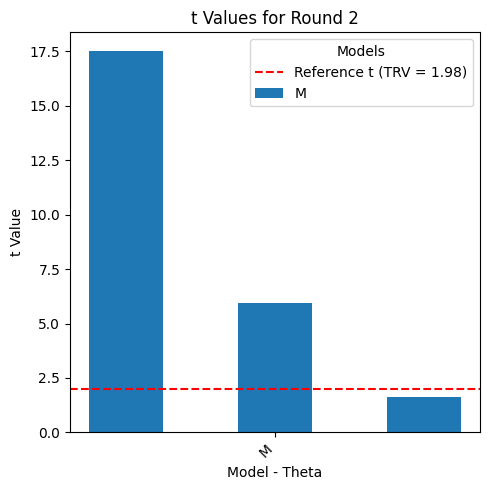

INFO:middoe.iden_utils:T values plot for Round 2 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\t_values_round_2.png.


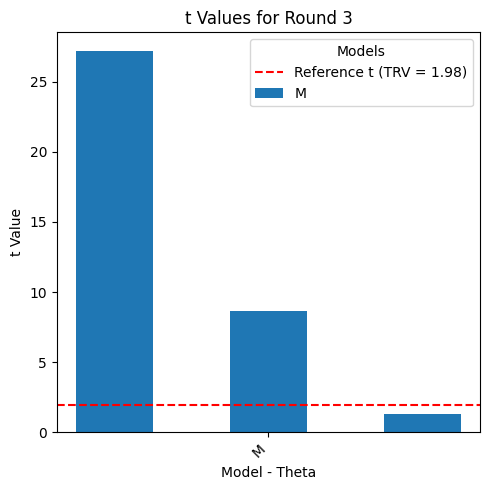

INFO:middoe.iden_utils:T values plot for Round 3 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\t_values_round_3.png.


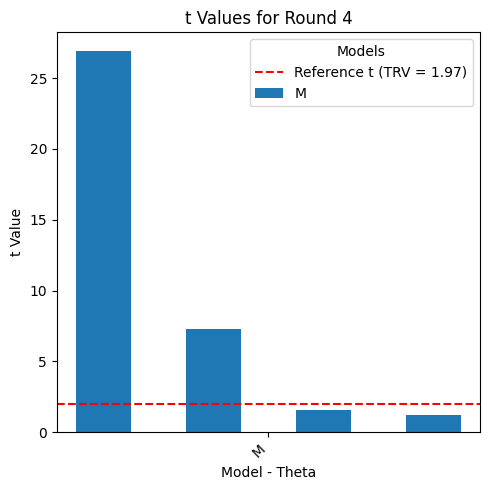

INFO:middoe.iden_utils:T values plot for Round 4 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\t_values_round_4.png.


Post-processing model: M


C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1988: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1988: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


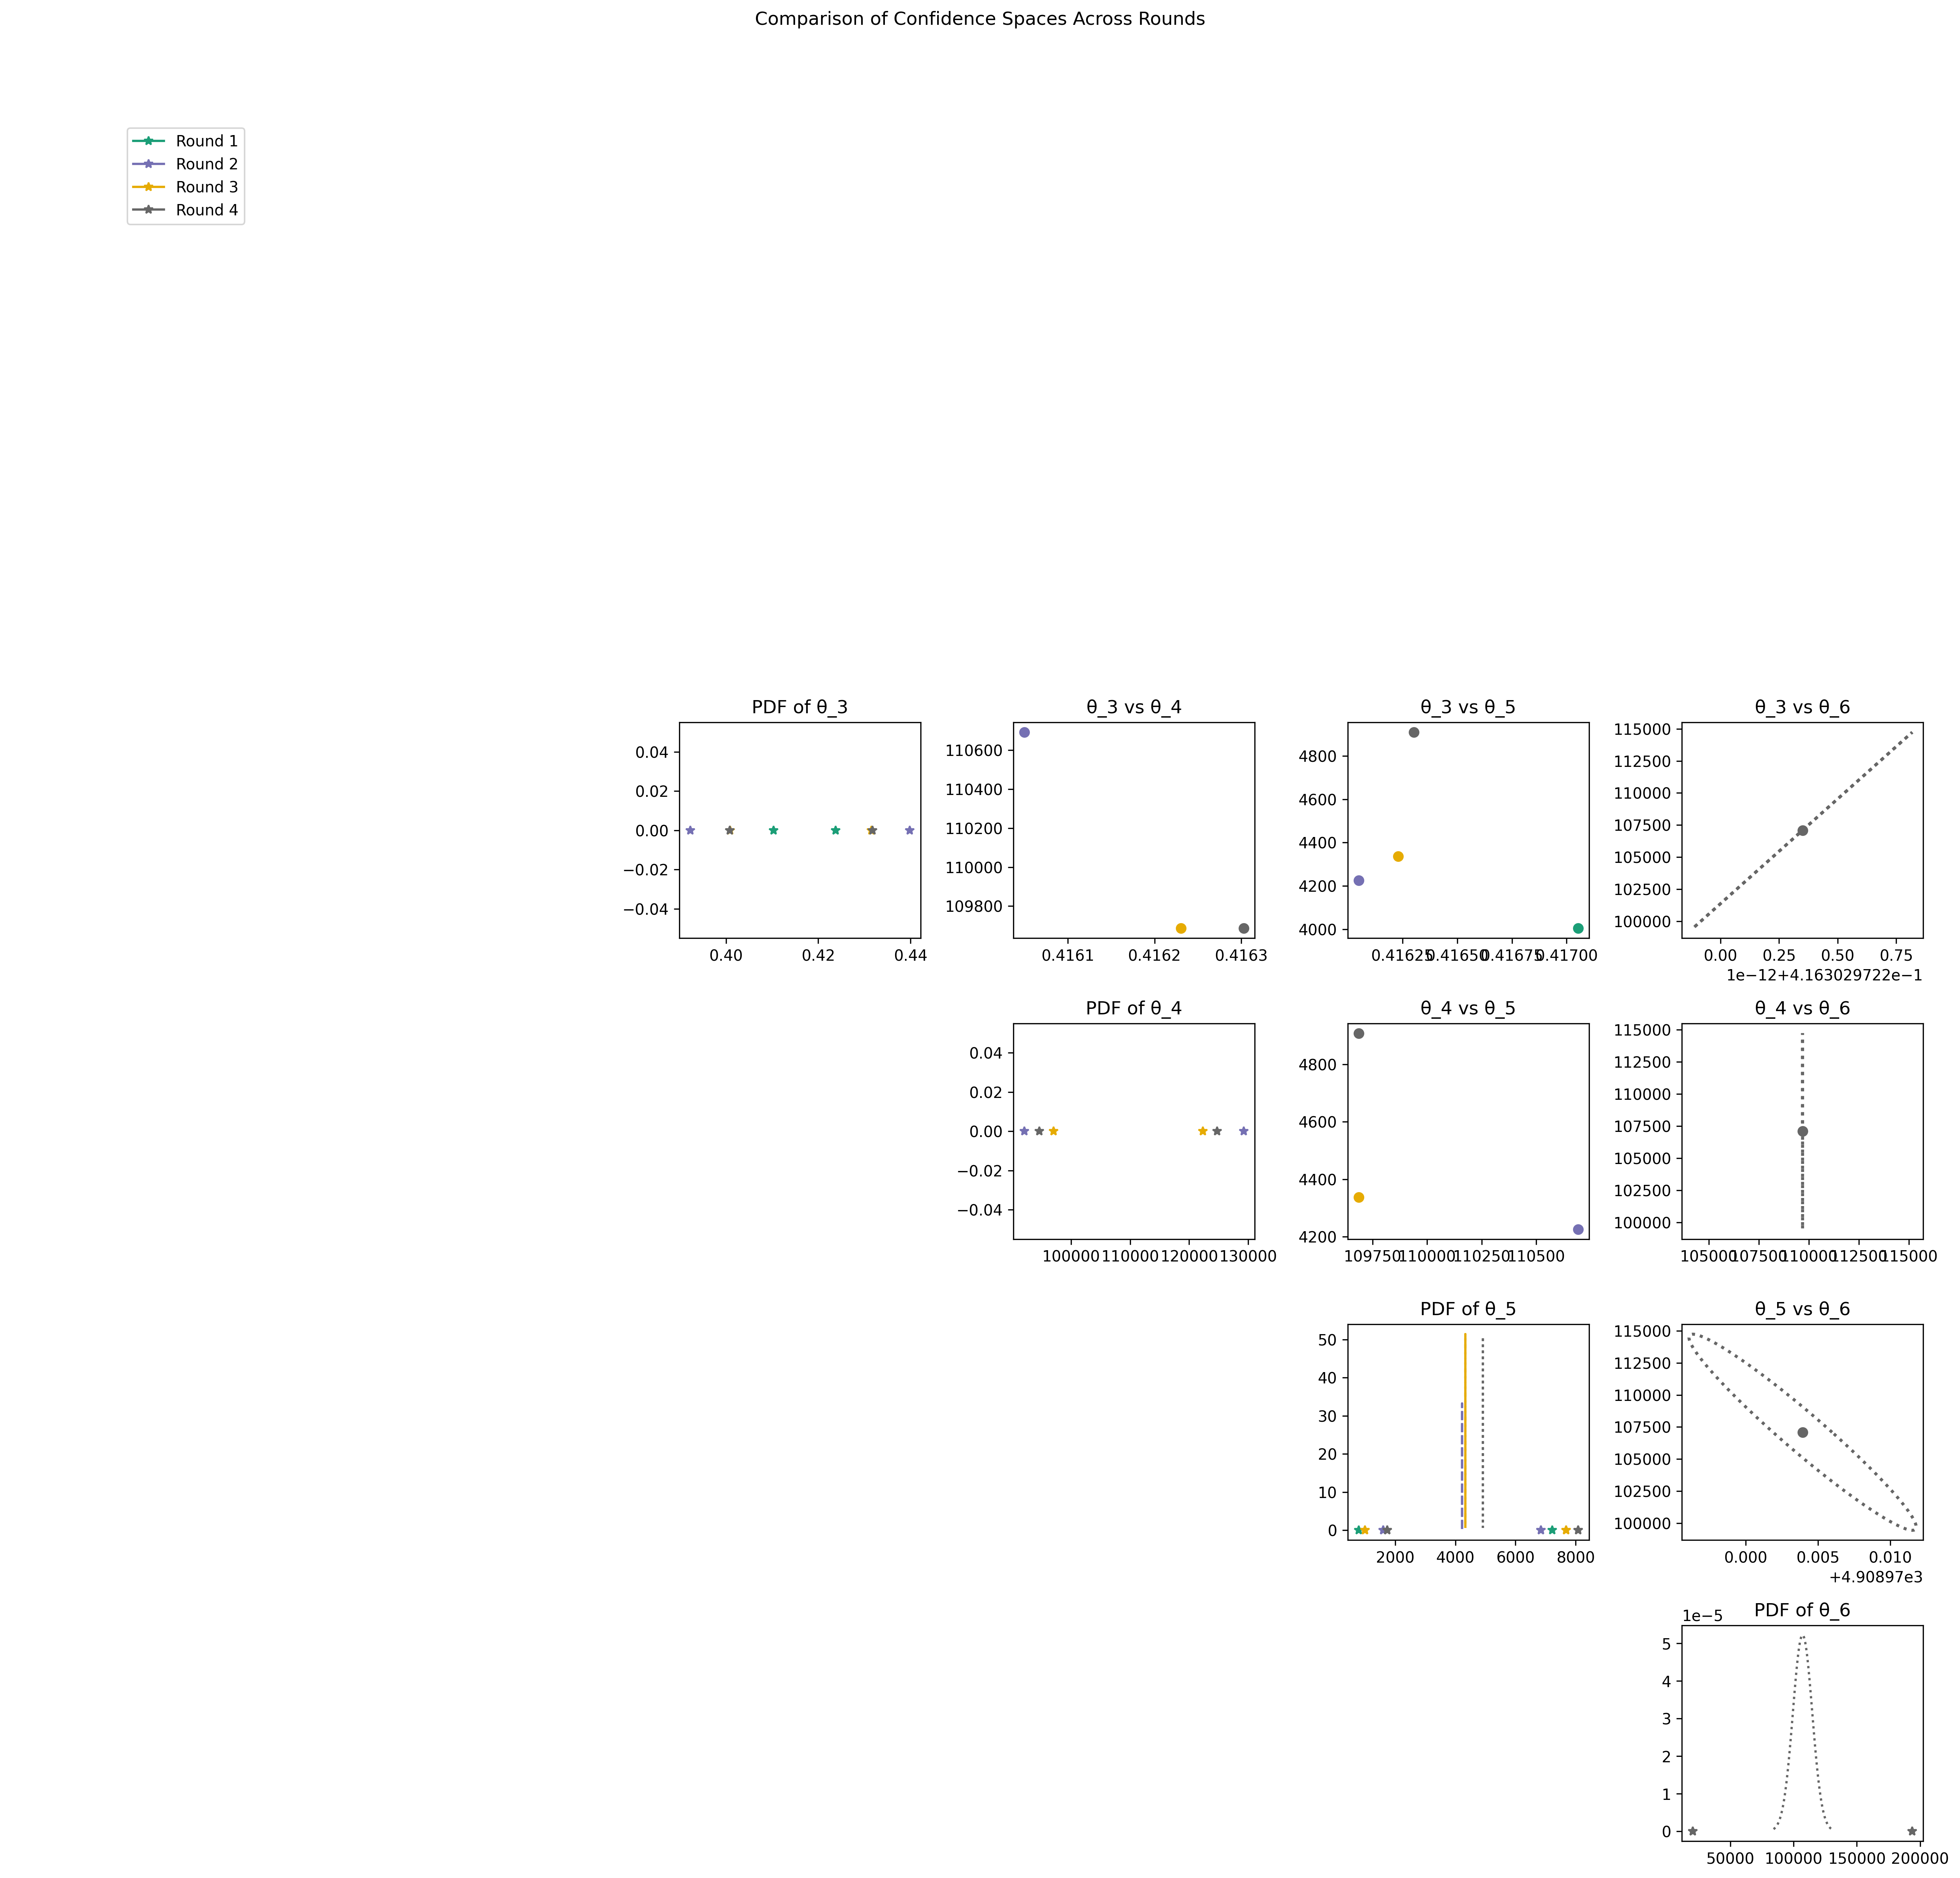

INFO:middoe.iden_utils:No valid rounds for conf_plot_metrics (possibly all broad).
INFO:middoe.iden_utils:No valid rounds for accvsprec_plot (all broad or none selected).
INFO:middoe.iden_utils:No valid rounds for pt_plot (all broad or none selected).
INFO:middoe.iden_utils:Reporter wrote data for Round 1 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\M_report_1.xlsx'.
INFO:middoe.iden_utils:Reporter wrote data for Round 2 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\M_report_2.xlsx'.
INFO:middoe.iden_utils:Reporter wrote data for Round 3 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\M_report_3.xlsx'.
INFO:middoe.iden_utils:Reporter wrote data for Round 4 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\M_report_4.xlsx'.
INFO:middoe.iden_utils:Summary written to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\M_report_sum

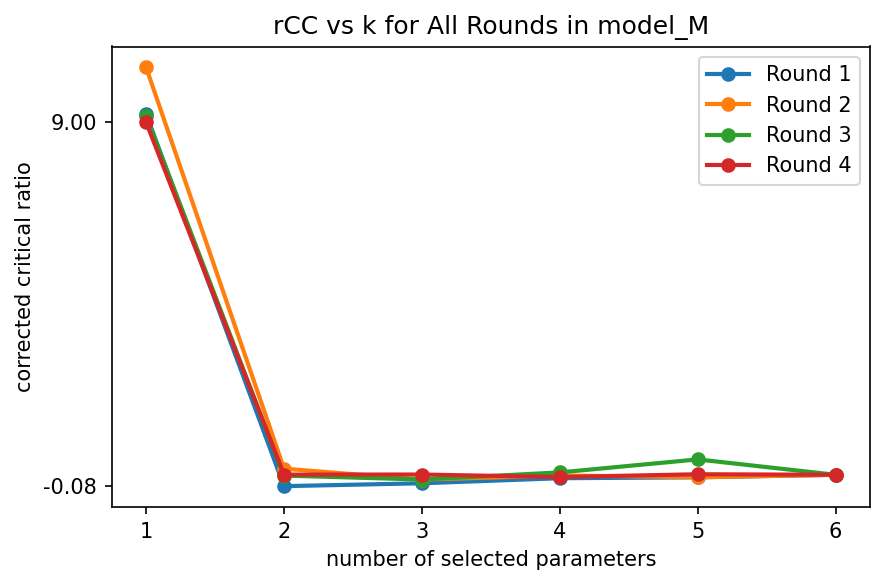

Plot saved in C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS2 - SC2\post_processing\estimability
Post-processing completed for: M


In [38]:
from middoe.log_utils import load_from_jac
results = load_from_jac()
iden = results['iden']

from middoe.iden_utils import run_postprocessing
run_postprocessing(
    round_data=results['iden'],
    solvers=['M'],
    selected_rounds=[ 1, 2, 3, 4],
    plot_global_p_and_t=True,
    plot_confidence_spaces=True,
    plot_p_and_t_tests=True,
    export_excel_reports=True,
    plot_estimability=True
)